# About

This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. This machine learning exercise aims to determine the relative importance of each parameter with regards to their contribution to the passengers’ overall travel experience. The dataset contains a random sample of individuals who travelled on this train. The on-time performance of the trains along with passenger information is published in a file named ‘Traveldata_train.csv’.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labelled ‘Surveydata_train.csv’.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labelled ‘Overall_Experience’. 

The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. You are provided test data containing the travel data and the survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same population.

### Goal:
The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train.

### Dataset:

The problem consists of 2 separate datasets: Travel data & Survey data. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they travelled. The survey data is aggregated data of surveys indicating the post-service experience. You are expected to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

- Train_Data
- Test_Data

**Target Variable:** Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The training set can be used to build your machine learning model. The training set has labels for the target column - Overall_Experience.

The testing set should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the ‘Overall_Experience’ level for each participant.

### Data Dictionary:

All the data is self-explanatory. The survey levels are explained in the Data Dictionary file.

### Submission File Format:
You will need to submit a CSV file with exactly 35,602 entries plus a header row. The file should have exactly two columns

- ID
- Overall_Experience (contains 0 & 1 values, 1 represents ‘Satisfied’, and 0 represents ‘Not Satisfied’)

### Evaluation Criteria:

Accuracy Score: The evaluation metric is simply the percentage of predictions made by the model that turned out to be correct. This is also called the accuracy of the model. It will be calculated as the total number of correct predictions (True Positives + True Negatives) divided by the total number of observations in the dataset.
 
In other words, the best possible accuracy is 100% (or 1) and the worst possible accuracy 0%.

## 0/ Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_survey_train = pd.read_csv("Surveydata_train.csv")
df_survey_submit = pd.read_csv("Surveydata_test.csv")

In [3]:
df_travel_train = pd.read_csv("Traveldata_train.csv")
df_travel_submit = pd.read_csv("Traveldata_test.csv")

In [4]:
df_survey_train.head()

ID  Overall_Experience       Seat_Comfort Seat_Class  \
0  98800001                   0  Needs Improvement  Green Car   
1  98800002                   0               Poor   Ordinary   
2  98800003                   1  Needs Improvement  Green Car   
3  98800004                   0         Acceptable   Ordinary   
4  98800005                   1         Acceptable   Ordinary   

  Arrival_Time_Convenient           Catering  Platform_Location  \
0               Excellent          Excellent    Very Convenient   
1               Excellent               Poor  Needs Improvement   
2       Needs Improvement  Needs Improvement  Needs Improvement   
3       Needs Improvement                NaN  Needs Improvement   
4              Acceptable         Acceptable         Manageable   

  Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
0                 Good     Needs Improvement     Acceptable   
1                 Good                  Poor           Good   
2    Needs Improvement                  Good      Excellent   
3           Acceptable     Needs Improvement     Acceptable   
4    Needs Improvement                  Good      Excellent   

  Ease_of_Online_Booking    Onboard_Service            Legroom  \
0      Needs Improvement  Needs Improvement         Acceptable   
1                   Good          Excellent  Needs Improvement   
2              Excellent          Excellent          Excellent   
3             Acceptable         Acceptable         Acceptable   
4                   Good               Good               Good   

    Baggage_Handling    CheckIn_Service        Cleanliness Online_Boarding  
0  Needs Improvement               Good  Needs Improvement            Poor  
1               Poor  Needs Improvement               Good            Good  
2          Excellent               Good          Excellent       Excellent  
3         Acceptable               Good         Acceptable      Acceptable  
4               Good               Good               Good            Good

In [5]:
df_survey_submit.head()

ID    Seat_Comfort Seat_Class Arrival_Time_Convenient    Catering  \
0  99900001      Acceptable  Green Car              Acceptable  Acceptable   
1  99900002  Extremely Poor   Ordinary                    Good        Poor   
2  99900003       Excellent   Ordinary               Excellent   Excellent   
3  99900004      Acceptable  Green Car               Excellent  Acceptable   
4  99900005       Excellent   Ordinary          Extremely Poor   Excellent   

   Platform_Location Onboard_Wifi_Service Onboard_Entertainment  \
0         Manageable    Needs Improvement             Excellent   
1         Manageable           Acceptable                  Poor   
2    Very Convenient            Excellent             Excellent   
3    Very Convenient                 Poor            Acceptable   
4  Needs Improvement            Excellent             Excellent   

  Online_Support Ease_of_Online_Booking    Onboard_Service            Legroom  \
0           Good              Excellent          Excellent          Excellent   
1     Acceptable             Acceptable          Excellent         Acceptable   
2      Excellent      Needs Improvement  Needs Improvement  Needs Improvement   
3      Excellent                   Poor         Acceptable  Needs Improvement   
4      Excellent              Excellent                NaN         Acceptable   

    Baggage_Handling CheckIn_Service        Cleanliness Online_Boarding  
0          Excellent            Good          Excellent            Poor  
1               Good      Acceptable          Excellent      Acceptable  
2  Needs Improvement            Good  Needs Improvement       Excellent  
3          Excellent       Excellent          Excellent            Poor  
4          Excellent       Excellent          Excellent       Excellent

In [6]:
df_travel_train.head()

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              272                      0.0                    5.0  
1             2200                      9.0                    0.0  
2             1061                     77.0                  119.0  
3              780                     13.0                   18.0  
4             1981                      0.0                    0.0

In [7]:
df_travel_submit.head()

ID  Gender      Customer_Type   Age      Type_Travel Travel_Class  \
0  99900001  Female                NaN  36.0  Business Travel     Business   
1  99900002  Female  Disloyal Customer  21.0  Business Travel     Business   
2  99900003    Male     Loyal Customer  60.0  Business Travel     Business   
3  99900004  Female     Loyal Customer  29.0  Personal Travel          Eco   
4  99900005    Male  Disloyal Customer  18.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              532                      0.0                    0.0  
1             1425                      9.0                   28.0  
2             2832                      0.0                    0.0  
3             1352                      0.0                    0.0  
4             1610                     17.0                    0.0

## 1/ Merge DF by same ID

#### Check if both df has the same order of columns

**Survey df**

In [8]:
df_survey_submit.columns == df_survey_train.columns.drop('Overall_Experience')

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

**Travel df**

In [9]:
df_travel_submit.columns == df_travel_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

#### Check if both df has the same length

In [10]:
df_survey_train.shape, df_travel_train.shape

((94379, 17), (94379, 9))

In [11]:
df_survey_submit.shape, df_travel_submit.shape

((35602, 16), (35602, 9))

All have same number of rows. Looks good to merge.

In [12]:
df = pd.merge(df_survey_train, df_travel_train, on = 'ID')
print(df.shape)
df.head()

(94379, 25)


ID  Overall_Experience       Seat_Comfort Seat_Class  \
0  98800001                   0  Needs Improvement  Green Car   
1  98800002                   0               Poor   Ordinary   
2  98800003                   1  Needs Improvement  Green Car   
3  98800004                   0         Acceptable   Ordinary   
4  98800005                   1         Acceptable   Ordinary   

  Arrival_Time_Convenient           Catering  Platform_Location  \
0               Excellent          Excellent    Very Convenient   
1               Excellent               Poor  Needs Improvement   
2       Needs Improvement  Needs Improvement  Needs Improvement   
3       Needs Improvement                NaN  Needs Improvement   
4              Acceptable         Acceptable         Manageable   

  Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
0                 Good     Needs Improvement     Acceptable   
1                 Good                  Poor           Good   
2    Needs Improvement                  Good      Excellent   
3           Acceptable     Needs Improvement     Acceptable   
4    Needs Improvement                  Good      Excellent   

  Ease_of_Online_Booking    Onboard_Service            Legroom  \
0      Needs Improvement  Needs Improvement         Acceptable   
1                   Good          Excellent  Needs Improvement   
2              Excellent          Excellent          Excellent   
3             Acceptable         Acceptable         Acceptable   
4                   Good               Good               Good   

    Baggage_Handling    CheckIn_Service        Cleanliness Online_Boarding  \
0  Needs Improvement               Good  Needs Improvement            Poor   
1               Poor  Needs Improvement               Good            Good   
2          Excellent               Good          Excellent       Excellent   
3         Acceptable               Good         Acceptable      Acceptable   
4               Good               Good               Good            Good   

   Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  Female  Loyal Customer  52.0              NaN     Business   
1    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  Female  Loyal Customer  43.0  Business Travel     Business   
3  Female  Loyal Customer  44.0  Business Travel     Business   
4  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              272                      0.0                    5.0  
1             2200                      9.0                    0.0  
2             1061                     77.0                  119.0  
3              780                     13.0                   18.0  
4             1981                      0.0                    0.0

In [13]:
df_submit = pd.merge(df_survey_submit, df_travel_submit, on = 'ID')
print(df_submit.shape)
df_submit.head()

(35602, 24)


ID    Seat_Comfort Seat_Class Arrival_Time_Convenient    Catering  \
0  99900001      Acceptable  Green Car              Acceptable  Acceptable   
1  99900002  Extremely Poor   Ordinary                    Good        Poor   
2  99900003       Excellent   Ordinary               Excellent   Excellent   
3  99900004      Acceptable  Green Car               Excellent  Acceptable   
4  99900005       Excellent   Ordinary          Extremely Poor   Excellent   

   Platform_Location Onboard_Wifi_Service Onboard_Entertainment  \
0         Manageable    Needs Improvement             Excellent   
1         Manageable           Acceptable                  Poor   
2    Very Convenient            Excellent             Excellent   
3    Very Convenient                 Poor            Acceptable   
4  Needs Improvement            Excellent             Excellent   

  Online_Support Ease_of_Online_Booking    Onboard_Service            Legroom  \
0           Good              Excellent          Excellent          Excellent   
1     Acceptable             Acceptable          Excellent         Acceptable   
2      Excellent      Needs Improvement  Needs Improvement  Needs Improvement   
3      Excellent                   Poor         Acceptable  Needs Improvement   
4      Excellent              Excellent                NaN         Acceptable   

    Baggage_Handling CheckIn_Service        Cleanliness Online_Boarding  \
0          Excellent            Good          Excellent            Poor   
1               Good      Acceptable          Excellent      Acceptable   
2  Needs Improvement            Good  Needs Improvement       Excellent   
3          Excellent       Excellent          Excellent            Poor   
4          Excellent       Excellent          Excellent       Excellent   

   Gender      Customer_Type   Age      Type_Travel Travel_Class  \
0  Female                NaN  36.0  Business Travel     Business   
1  Female  Disloyal Customer  21.0  Business Travel     Business   
2    Male     Loyal Customer  60.0  Business Travel     Business   
3  Female     Loyal Customer  29.0  Personal Travel          Eco   
4    Male  Disloyal Customer  18.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              532                      0.0                    0.0  
1             1425                      9.0                   28.0  
2             2832                      0.0                    0.0  
3             1352                      0.0                    0.0  
4             1610                     17.0                    0.0

## 2/ Quality check 

**Check duplicate:**

In [14]:
df.duplicated().value_counts()

False    94379
dtype: int64

In [15]:
df_submit.duplicated().value_counts()

False    35602
dtype: int64

**Check null on train dataset:**

In [16]:
df.isnull().sum()[df.isnull().sum() != 0]

Seat_Comfort                 61
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [17]:
df[df.isnull().any(axis=1)].shape

(38876, 25)

About 1/3 of all entries has at least a null value or more.

**Columns with null on train set**

In [18]:
cols_with_null = df.isnull().any()[df.isnull().any()].index
cols_with_null

Index(['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding', 'Gender', 'Customer_Type', 'Age', 'Type_Travel',
       'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'],
      dtype='object')

**Columns with null on submit set**

In [19]:
col_with_null_submit = df_submit.isnull().any()[df.isnull().any()].index
col_with_null_submit

Index(['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding', 'Gender', 'Customer_Type', 'Age', 'Type_Travel',
       'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'],
      dtype='object')

In [20]:
cols_with_null == col_with_null_submit

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

Both df and df_submit have nulls on the same columns.

## 3/ EDA

### Summary info:

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_Location        94349 non-null  object 
 7   Onboard_Wifi_Service     94349 non-null  object 
 8   Onboard_Entertainment    94361 non-null  object 
 9   Online_Support           94288 non-null  object 
 10  Ease_of_Online_Booking   94306 non-null  object 
 11  Onboard_Service          86778 non-null  object 
 12  Legroom                  94289 non-null  object 
 13  Baggage_Handling         94237 non-null  object 
 14  CheckIn_Service       

**Observation:**
- All columns seem to have the correct datatype. 
- Even though 'Age' dtype is float, in the dataset it appeared to be rounded. This could be converted to int to be slightly more memory efficient if needed.

**Descriptive statistics summary:**

In [22]:
df.describe().T

count          mean           std         min  \
ID                       94379.0  9.884719e+07  27245.014865  98800001.0   
Overall_Experience       94379.0  5.466576e-01      0.497821         0.0   
Age                      94346.0  3.941965e+01     15.116632         7.0   
Travel_Distance          94379.0  1.978888e+03   1027.961019        50.0   
Departure_Delay_in_Mins  94322.0  1.464709e+01     38.138781         0.0   
Arrival_Delay_in_Mins    94022.0  1.500522e+01     38.439409         0.0   

                                25%         50%         75%         max  
ID                       98823595.5  98847190.0  98870784.5  98894379.0  
Overall_Experience              0.0         1.0         1.0         1.0  
Age                            27.0        40.0        51.0        85.0  
Travel_Distance              1359.0      1923.0      2538.0      6951.0  
Departure_Delay_in_Mins         0.0         0.0        12.0      1592.0  
Arrival_Delay_in_Mins           0.0         0.0        13.0      1584.0

Age seems to be normally distributed, while Travel_Distance, Departure and Arrival Delay have skewness and/or extreme outliers.

### Univariate analysis - Survey data

Split the features into survey data and personal data

In [23]:
survey_cols = df.columns[1:16].tolist()
info_cols = df.columns[16:].tolist()

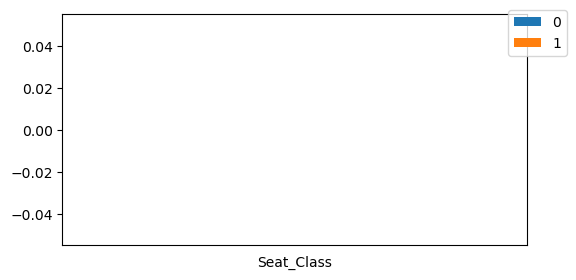

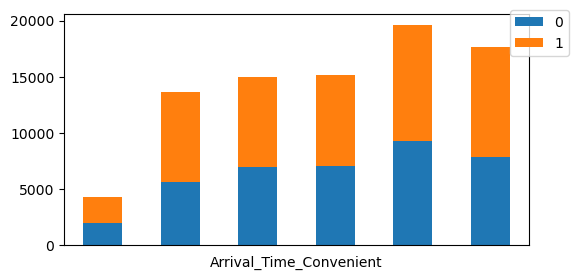

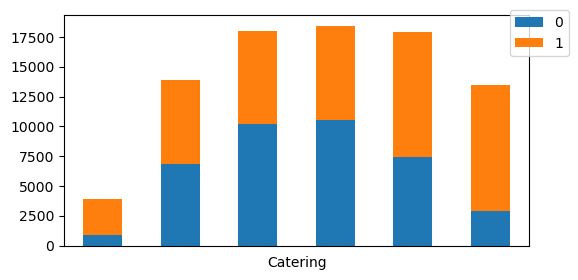

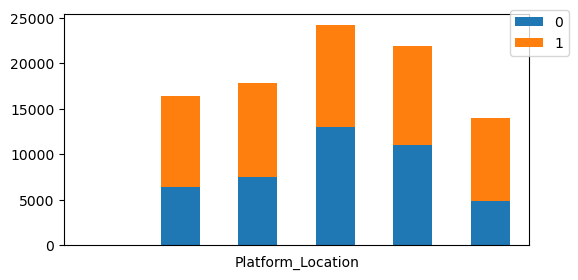

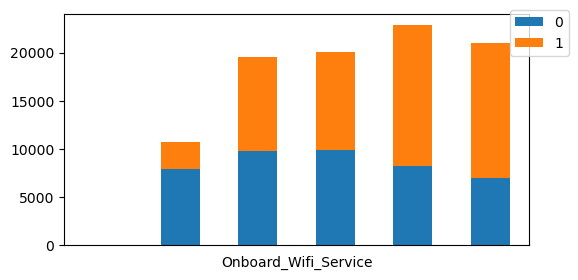

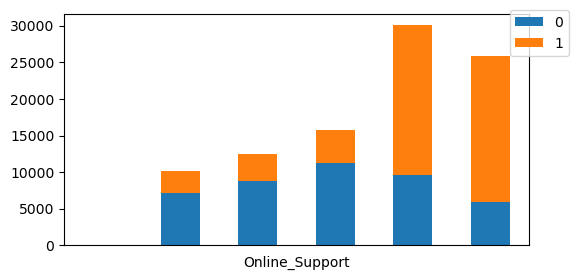

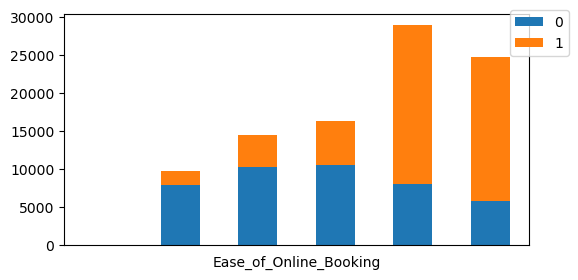

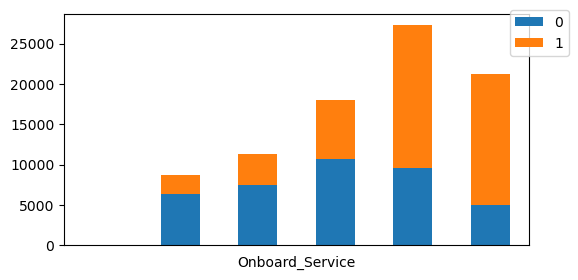

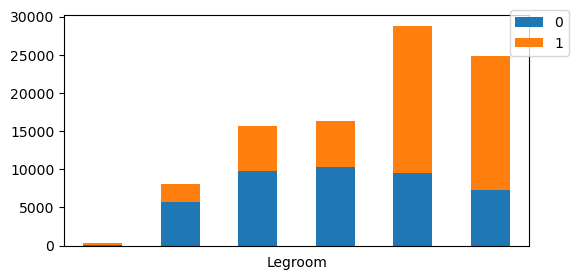

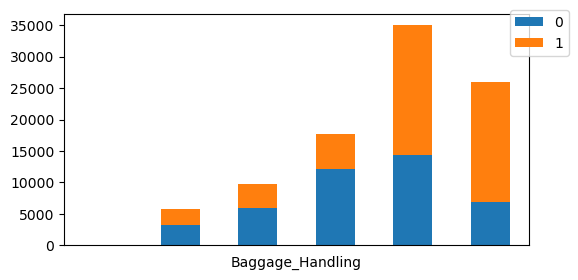

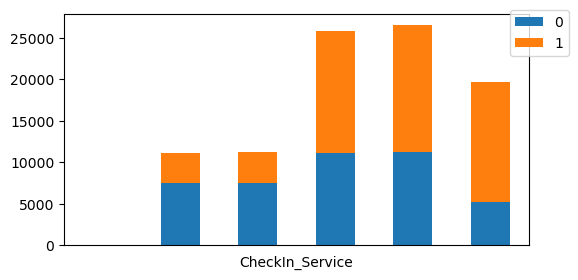

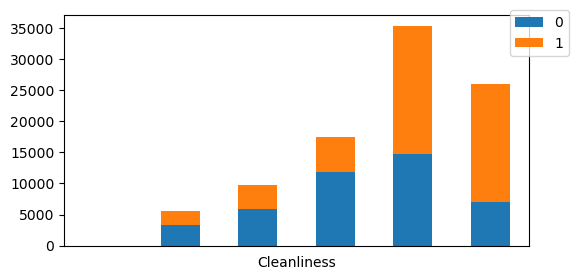

In [24]:
order1 = ['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor']
order1.reverse()
df['Platform_Location'].replace(['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient','Very Inconvenient'],
                                ['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'],
                               inplace = True
                               )

for col in survey_cols[1:]:
    pd.crosstab(df[col],df['Overall_Experience']).reindex(order1).plot(kind='bar',stacked=True,figsize=(6,3))
    plt.xticks([])
    plt.legend(bbox_to_anchor=(1.1, 1.05))

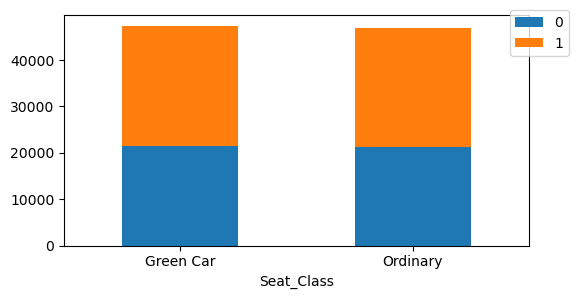

In [25]:
pd.crosstab(df['Seat_Class'],df['Overall_Experience']).plot(kind='bar',stacked=True,figsize=(6,3))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xticks(rotation = 0)
plt.show()

**Observation:**
- The ratings seem to be skewed to the left, biased towards either Acceptable-Good or Good-Excellent.
- Onboard wifi service, Onboard entertainment, Online support, online booking, onboarding service, legroom, baggage handling, Check in service, Cleanliness are some of the most important factors that affect the customer experience, people who gave higher ratings are more satisfied with the service. These can be important features for the prediction.

- On the other hand, Seat class, Seat comfort, arrival time, platform location, catering, doesn't seem to affect much. The satisfied / non satisfied ratio seems to be the similar accross low to high ratings.

### Univariate analysis - demographic data

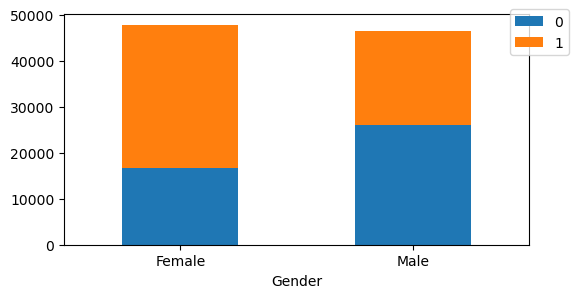

In [26]:
pd.crosstab(df[info_cols[1]],df['Overall_Experience']).plot(kind='bar',stacked=True,figsize=(6,3))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xticks(rotation = 0)
plt.show()

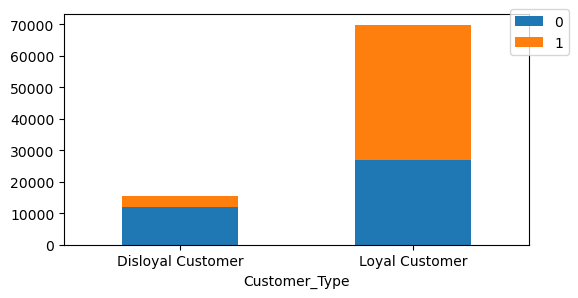

In [27]:
pd.crosstab(df[info_cols[2]],df['Overall_Experience']).plot(kind='bar',stacked=True,figsize=(6,3))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xticks(rotation = 0)

plt.show()

- Loyal vs disloyal customer are highly imbalanced, and ratio of unsatisfied are higher among the disloyal.
- Ratio of satisfied customer is higher in Female than in Male.

In [42]:
# box + kde plot for numerical variables
def numerical_chart(feature):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(df[feature], ax=ax_box)
    sns.kdeplot(df[feature], ax=ax_hist)
    ax_box.set(xlabel=feature)
    plt.show()

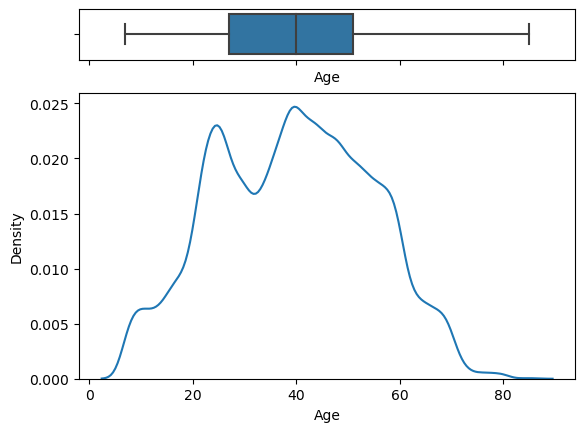

In [43]:
numerical_chart('Age')

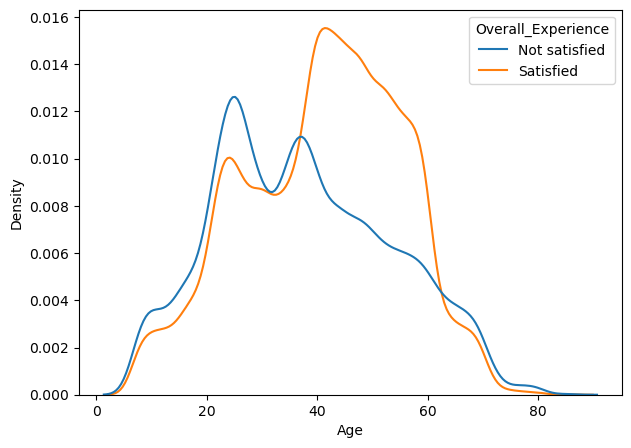

In [44]:
plt.figure(figsize=(7, 5)) 
sns.kdeplot(df['Age'], hue=df['Overall_Experience'].map({0: 'Not satisfied', 1:'Satisfied'}))  
plt.show()

- Age has a bimodal distribution.
- Upon closer inspection, satisfied customer's distribution is left-skewed while not-satisfied is right skewed. In other words, there are more satisfied customers in older age range (roughly from 30-35 and up) than the younger.

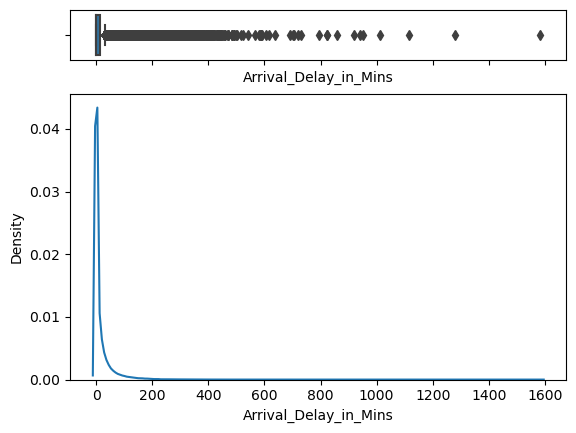

In [45]:
numerical_chart('Arrival_Delay_in_Mins')

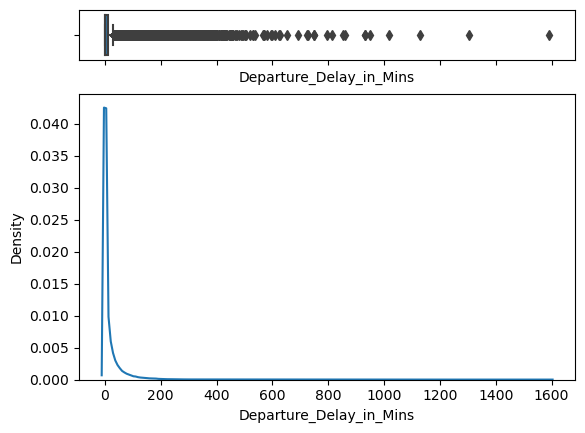

In [46]:
numerical_chart('Departure_Delay_in_Mins')

**\*Arrival/Departure delay where != 0**

In [47]:
feature = df['Arrival_Delay_in_Mins'][df['Arrival_Delay_in_Mins']!=0]
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(feature, ax=ax_box)
sns.histplot(feature, ax=ax_hist)
plt.show()

In [48]:
feature = df['Departure_Delay_in_Mins'][df['Departure_Delay_in_Mins']!=0]
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(feature, ax=ax_box)
sns.histplot(feature, ax=ax_hist)
plt.show()

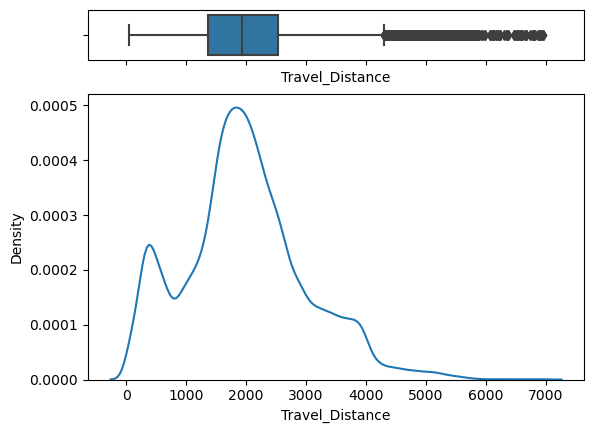

In [49]:
numerical_chart('Travel_Distance')

- Delays variables (both Arrival and Departure) is extremely right skewed and has huge amount of outliers.
- Travel distance has outlier that need to be taken care of as well.

### Bivariate analysis

**Customer experience pairplot**

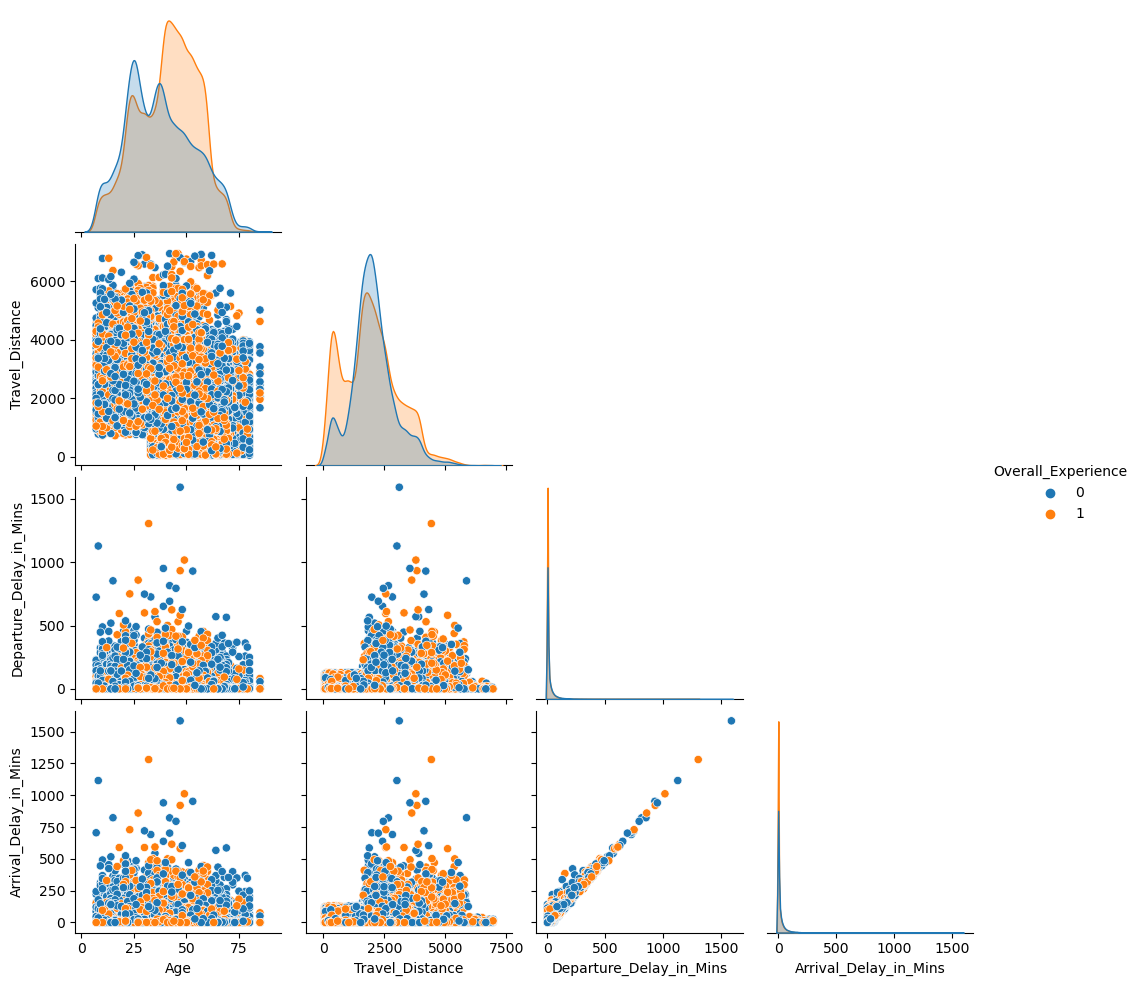

In [ ]:
sns.pairplot(df.drop(columns=['ID']), hue='Overall_Experience', corner = True)

**A few things to note:**
- The difference in customer exp. distribution in Age.
- Departure/Arrival delay are closely correlated.
- The strange arrival/departure delay - travel distance pair "limit" on the left side.
- The missing chunk in travel-age pair in lower left side

#### Age vs Distance

**Function**

In [ ]:
# Make subplot, provide string column
def make_scatter(df,data_x,data_y,data_hue, alpha = 0.1):
    fig, [ax_1,ax_2,ax_3] = plt.subplots(ncols=3, sharex=True, sharey=False,figsize=(15,4))  
    color_dict = dict({df[data_hue].value_counts().index[0]:'steelblue',df[data_hue].value_counts().index[1]:'darkorange'})
    sns.scatterplot(data = df, y=data_y, x = data_x, hue = data_hue, alpha = alpha, s=10, palette = color_dict, ax = ax_1)
    sns.scatterplot(data = df, y=df[data_y][df[data_hue] == df[data_hue].value_counts().index[0]], x = df[data_x][df[data_hue] == df[data_hue].value_counts().index[0]],hue = data_hue, alpha = alpha/2, s=5, palette = color_dict, ax = ax_2)
    sns.scatterplot(data = df, y=df[data_y][df[data_hue] == df[data_hue].value_counts().index[1]], x = df[data_x][df[data_hue] == df[data_hue].value_counts().index[1]],hue = data_hue, alpha = alpha/2, s=5, palette = color_dict, ax = ax_3)
    ax_1.set_ylim(0,90),ax_2.set_ylim(0,90),ax_3.set_ylim(0,90)
    
# Make subplot, provide pd series 
def make_scatter_2(data_x,data_y,data_hue, alpha = 0.1):
    fig, [ax_1,ax_2,ax_3] = plt.subplots(ncols=3, sharex=True, sharey=False,figsize=(15,4))  
    color_dict = dict({data_hue.value_counts().index[0]:'steelblue',data_hue.value_counts().index[1]:'darkorange'})
    sns.scatterplot(y=data_y, x = data_x, hue = data_hue, alpha = alpha, s=10, palette = color_dict, ax = ax_1)
    sns.scatterplot(y=data_y[data_hue == data_hue.value_counts().index[0]], x = data_x[data_hue == data_hue.value_counts().index[0]],hue = data_hue, alpha = alpha/2, s=5, palette = color_dict, ax = ax_2)
    sns.scatterplot(y=data_y[data_hue == data_hue.value_counts().index[1]], x = data_x[data_hue == data_hue.value_counts().index[1]],hue = data_hue, alpha = alpha/2, s=5, palette = color_dict, ax = ax_3)

**Plot Age vs Travel Distance, hue = target**

In [ ]:
make_scatter(df,'Travel_Distance','Age','Overall_Experience')

Initial impression is that the distribution of travel distance among age is very unusual.

Looks like there may be at least 2 different age groups, which contains overlapping sub groups in itself:
- from age minimum (~7) to age 33: in which splitted into age 7-21 and age 22-33. <br>This group seems to have a soft floor limit around 1000km and soft ceiling limit around 3000km for age 7-21 and no ceiling for age 22-33.
- from age 34-70 (or 34-80?): this groups seem to have a hard ceiling limit about 4000km distance. Also there are 2 overlapping sub-groups: age 34-60 and age 34-70. There's more class 0 ('Unsatisfied') in the latter than the former.

Also, class 0 distribution seems to be normally distributed (need checking) around 2000km mean, ranging from 1000~3000, whereas class 1 has some artifical limit.

A possible explanation for this is that, this dataset was not sampled randomly, but was a **combination of multiple surveys on different demographic groups**, each survey had **its own criterias and limits**, hence the unusual distribution.

**Plot Age vs Distance, hue = other variables**

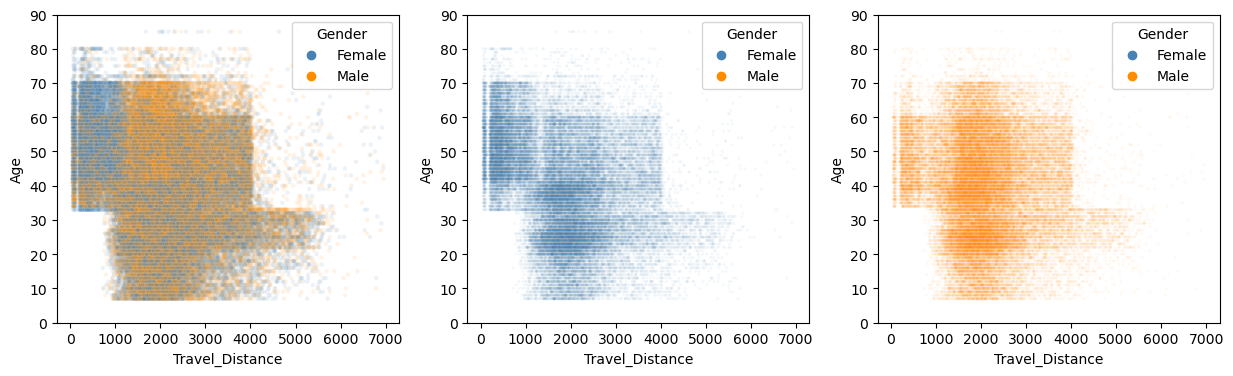

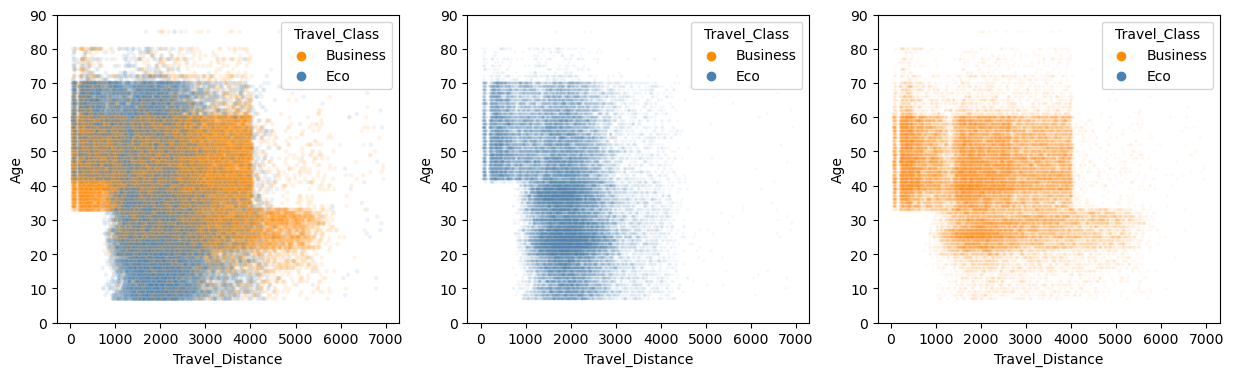

In [210]:
for feature in ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class']:
    make_scatter(df,'Travel_Distance','Age',feature)

**Observation:**
- More female than male in range 0-1000km
- Disloyal customer distributed normally around 2000k, no artificial limit
- For type travel: 
>- personal travel: age's hard limit is 70. There's no ceiling for distance.
>- business travel: age's soft limit at 60. Travel distance limit at 4000km for age 34+, no limit for under 34.
- Travel class is very similar to type travel.

**Try to separate the groups:**

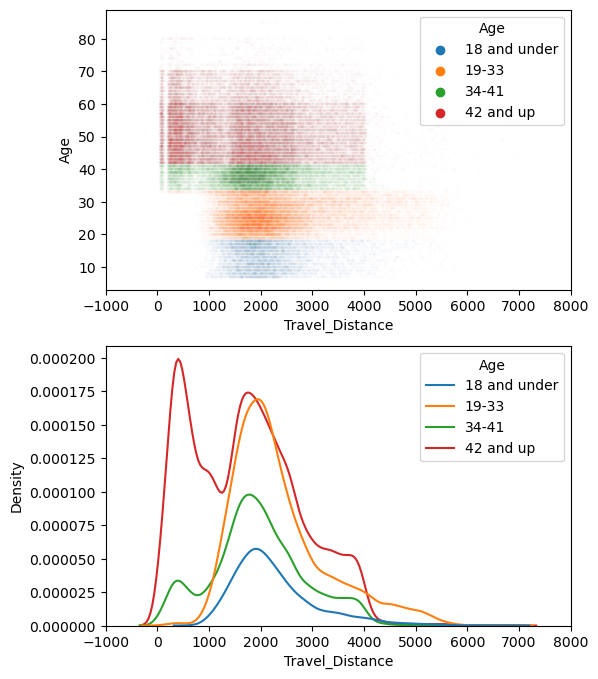

In [211]:
feature = df['Travel_Distance']
hue = pd.cut(df['Age'], [0,18, 33, 41, 100],labels= ['18 and under','19-33','34-41','42 and up'])

fig,[ax1,ax2] = plt.subplots(2, figsize=(6,8))  
sns.scatterplot(data = df, y='Age', x = 'Travel_Distance', hue = hue, alpha = 0.01, s=5, ax = ax1)
sns.kdeplot(feature, hue=hue, ax=ax2)
ax1.set_xlim(-1000,8000),ax2.set_xlim(-1000,8000)
plt.show()  

- Age 18's and age 19-32's travel distance is quite close to a normal distribution albeit slightly right skewed
- age 42+ is bimodal distribution.
- Looks like there are 2 overlapping age group: (age 33-60, Eco class) and (age 42-70, Business class)?

**For age 33++, splited by Travel_Class**

In [212]:
feature, where = df['Travel_Distance'], (df['Age']>=33)
hue = df['Travel_Class'][where]
title = 'Travel distance, age 33 and up, hue split by Travel_Class'

fig,[ax1,ax2] = plt.subplots(2, figsize=(6,6))  
sns.scatterplot(y=df['Age'][where], x = feature, hue = hue, alpha = 0.05, s=5, ax = ax1)
sns.kdeplot(feature[where], hue=hue, ax=ax2)  
ax1.set_title(title)
plt.tight_layout()
plt.show()

**For age 33++, splited by Type_Travel**

In [213]:
feature, where = df['Travel_Distance'], (df['Age']>=33)
hue = df['Type_Travel'][where]
title = 'Travel distance, age 33 and up, hue split by Type_Travel'

fig, [ax1,ax2] = plt.subplots(2, figsize=(6,6))  
sns.scatterplot(y=df['Age'][where], x = feature, hue = hue, alpha = 0.05, s=5, ax = ax1)
sns.kdeplot(feature[where], hue=hue, ax=ax2) 
ax1.set_title(title)
plt.tight_layout()
plt.show()

**Age 33-41, split by Travel_Class**

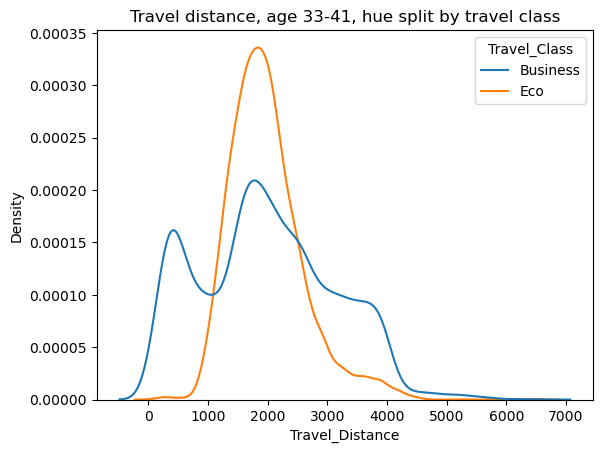

In [214]:
feature, where = df['Travel_Distance'], (df['Age']>=33) & (df['Age']<42)
hue = df['Travel_Class'][where]
title = 'Travel distance, age 33-41, hue split by travel class'

sns.kdeplot(feature[where], hue=hue)  
plt.title(title)
plt.show()

**Age 42+, splited by Travel_Class**

In [215]:
feature, where = df['Travel_Distance'], (df['Age']>=42)
hue = df['Travel_Class'][where]
title = 'Travel distance, age 42 and up, hue split by travel class'

fig, [ax1,ax2] = plt.subplots(2, figsize=(6,6))  
sns.scatterplot(y=df['Age'][where], x = feature, hue = hue, alpha = 0.05, s=5, ax = ax1)
sns.kdeplot(feature[where], hue=hue, ax=ax2) 
plt.title(title)
plt.tight_layout()
plt.show()

**Age 42+, splited by Type Travel**

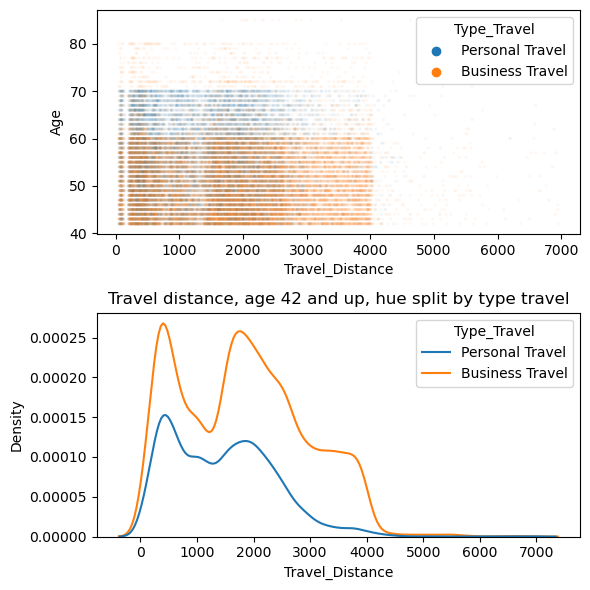

In [216]:
feature, where = df['Travel_Distance'],(df['Age']>=42)
hue = df['Type_Travel'][where]
title = 'Travel distance, age 42 and up, hue split by type travel'

fig, [ax1,ax2] = plt.subplots(2, figsize=(6,6))  
sns.scatterplot(y=df['Age'][where], x = feature, hue = hue, alpha = 0.05, s=5, ax = ax1)
sns.kdeplot(feature[where], hue=hue, ax=ax2) 
plt.title(title)
plt.tight_layout()
plt.show()

- Age 33-41, Eco Class has travel distance's distribution close to a normal distribution. This group could have been a subset of a survey.
- Still not yet able to separate the bimodal in business class in both age groups
- Maybe in age 33++, business -> separate with another variable?

**Age 33++, business, separate by gender** -->Nope

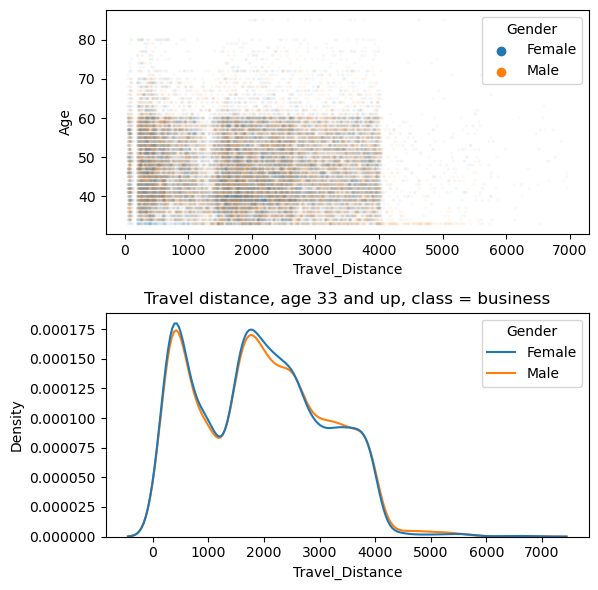

In [217]:
feature = df['Travel_Distance']
where = (df['Age']>=33) & (df['Travel_Class'] == 'Business')
hue = df['Gender'][where]
title = 'Travel distance, age 33 and up, class = business'

fig, [ax1,ax2] = plt.subplots(2, figsize=(6,6))  
sns.scatterplot(y=df['Age'][where], x = feature, hue = hue, alpha = 0.05, s=5, ax = ax1)
sns.kdeplot(feature[where], hue=hue, ax=ax2) 
plt.title(title)
plt.tight_layout()
plt.show()

**Age 33++, business, separate by delay?** --> also nope

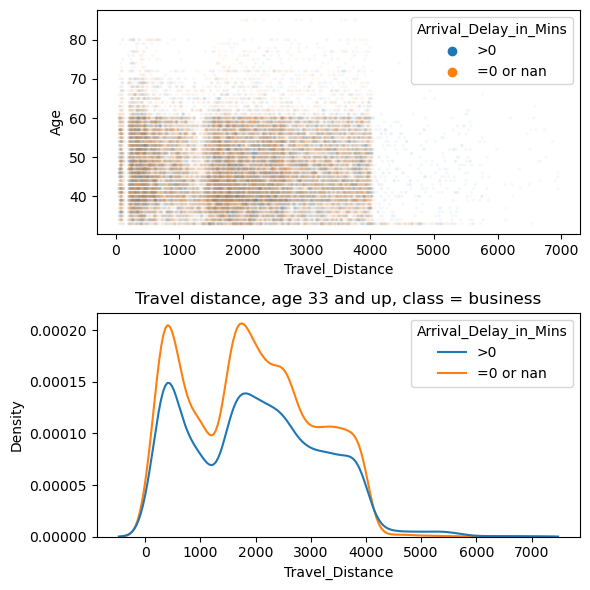

In [218]:
feature = df['Travel_Distance']
where = (df['Age']>=33) & (df['Travel_Class'] == 'Business')
hue = (df['Arrival_Delay_in_Mins'][where]>0).map({True: '>0', False: '=0 or nan'})
title = 'Travel distance, age 33 and up, class = business'

fig, [ax1,ax2] = plt.subplots(2, figsize=(6,6))  
sns.scatterplot(y=df['Age'][where], x = feature, hue = hue, alpha = 0.05, s=5, ax = ax1)
sns.kdeplot(feature[where], hue=hue, ax=ax2) 
plt.title(title)
plt.tight_layout()
plt.show()

#### Delay vs Travel distance

In [219]:
print('Delay equals 0:')
print((df['Departure_Delay_in_Mins']==0).value_counts())
plt.figure(figsize=(8, 4)) 
sns.scatterplot(data = df, x = 'Travel_Distance',  y = 'Departure_Delay_in_Mins', hue = 'Type_Travel', alpha = 0.1, s=30)
plt.axhline(130)
plt.ylim(0,500)

Delay equals 0:
True     53339
False    41040
Name: Departure_Delay_in_Mins, dtype: int64


(0.0, 500.0)

**Age vs Delay in 4 different age groups:**

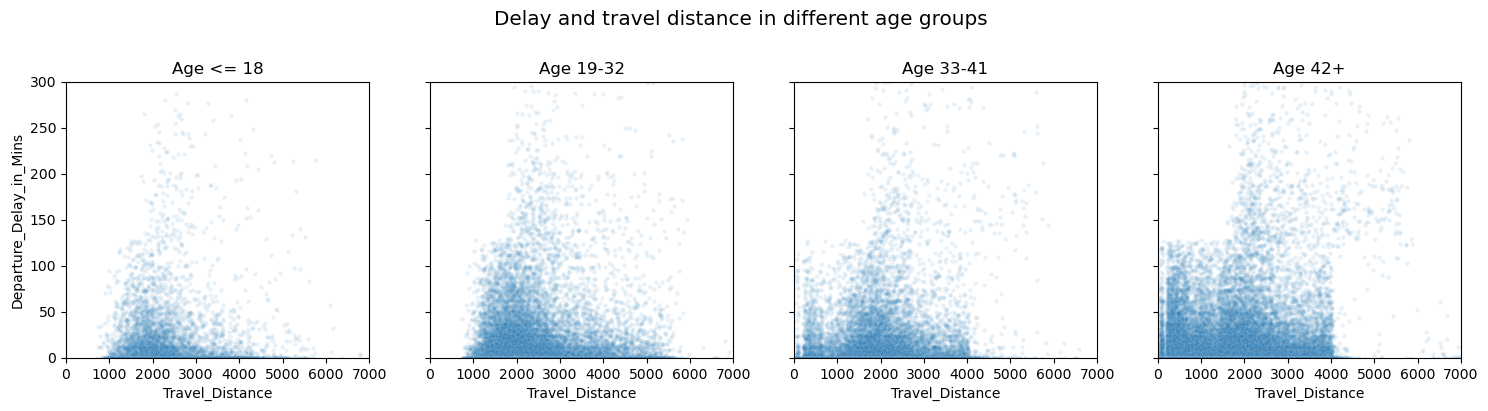

In [53]:
feature_y, feature_x = df['Departure_Delay_in_Mins'], df['Travel_Distance']
where1, title1 = df['Age']<=18, 'Age <= 18'
where2, title2 = df['Age'].isin(range(19,33)), 'Age 19-32'
where3, title3 = df['Age'].isin(range(33,42)), 'Age 33-41'
where4, title4 = (df['Age']>=42), 'Age 42+'

fig, ax = plt.subplots(ncols=4, sharex=True, sharey=True, figsize=(18,4))  
fig.suptitle("Delay and travel distance in different age groups", fontsize="x-large")
fig.subplots_adjust(top=0.8)

for where,title,ax in zip([where1,where2,where3,where4],[title1,title2,title3,title4],ax):
    ax.set_title(title)
    sns.scatterplot(x = feature_x[where], y = feature_y[where], alpha = 0.1, s=10, ax = ax)
    ax.set(ylim = (0,300), xlim = (0,7000))
plt.show()

(0.0, 500.0)

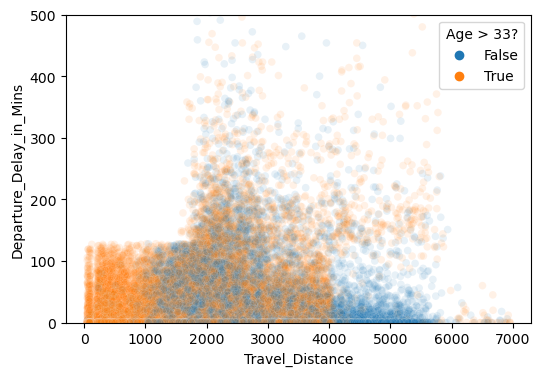

In [221]:
plt.figure(figsize=(6, 4)) 
sns.scatterplot(data = df, x = 'Travel_Distance', y = 'Departure_Delay_in_Mins', hue = df['Age']>33, alpha = 0.1, s=30)
plt.legend(title='Age > 33?', loc='upper right')
plt.ylim(0,500)

**Age 33-41, distribution of Delay vs Distance in different travel class and type travel**

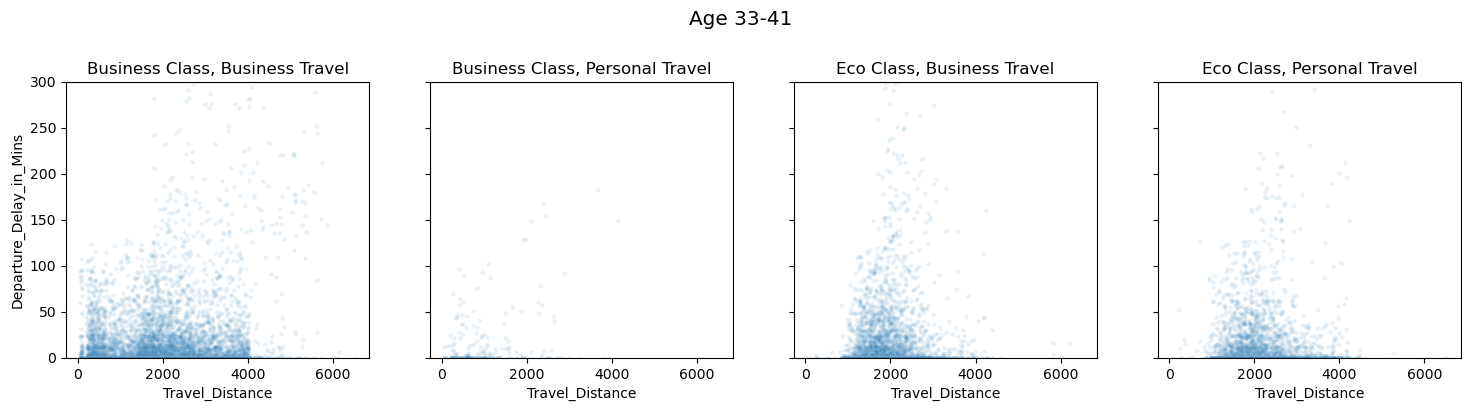

In [222]:
feature_y, feature_x = df['Departure_Delay_in_Mins'], df['Travel_Distance']
where1 = (df['Age'].isin(range(33,42))) & (df['Travel_Class']=='Business') & (df['Type_Travel']=='Business Travel')
title1 = 'Business Class, Business Travel'
where2 = (df['Age'].isin(range(33,42))) & (df['Travel_Class']=='Business') & (df['Type_Travel']=='Personal Travel')
title2 = 'Business Class, Personal Travel'
where3 = (df['Age'].isin(range(33,42))) & (df['Travel_Class']=='Eco') & (df['Type_Travel']=='Business Travel')
title3 = 'Eco Class, Business Travel'
where4 = (df['Age'].isin(range(33,42))) & (df['Travel_Class']=='Eco') & (df['Type_Travel']=='Personal Travel')
title4 = 'Eco Class, Personal Travel'

fig, ax = plt.subplots(ncols=4, sharex=True, sharey=True, figsize=(18,4)) 
fig.suptitle("Age 33-41", fontsize="x-large")
fig.subplots_adjust(top=0.8)

for where,title,ax in zip([where1,where2,where3,where4],[title1,title2,title3,title4],ax):
    ax.set_title(title)
    sns.scatterplot(x = feature_x[where], y = feature_y[where], alpha = 0.1, s=10, ax = ax)
    ax.set(ylim = (0,300), xlim = (0,7000))
plt.show()

**Age 42+, distribution of Delay vs Distance in different travel class and type travel**

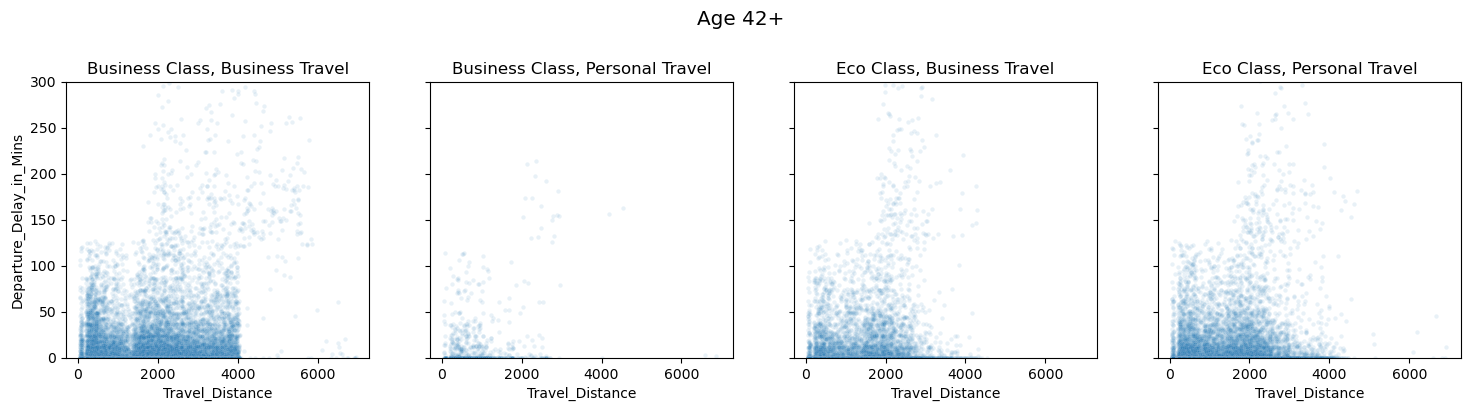

In [223]:
feature_y, feature_x = df['Departure_Delay_in_Mins'], df['Travel_Distance']
where1 = (df['Age']>=42) & (df['Travel_Class']=='Business') & (df['Type_Travel']=='Business Travel')
title1 = 'Business Class, Business Travel'
where2 = (df['Age']>=42) & (df['Travel_Class']=='Business') & (df['Type_Travel']=='Personal Travel')
title2 = 'Business Class, Personal Travel'
where3 = (df['Age']>=42)  & (df['Travel_Class']=='Eco') & (df['Type_Travel']=='Business Travel')
title3 = 'Eco Class, Business Travel'
where4 = (df['Age']>=42) & (df['Travel_Class']=='Eco') & (df['Type_Travel']=='Personal Travel')
title4 = 'Eco Class, Personal Travel'

fig,ax = plt.subplots(ncols=4, sharex=True, sharey=True, figsize=(18,4)) 
fig.suptitle("Age 42+", fontsize="x-large")
fig.subplots_adjust(top=0.8)

for where,title,ax in zip([where1,where2,where3,where4],[title1,title2,title3,title4],ax):
    ax.set_title(title)
    sns.scatterplot(x = feature_x[where], y = feature_y[where], alpha = 0.1, s=10, ax = ax)
    ax.set(ylim = (0,300), xlim = (0,7000))
plt.show()

**Observation:**
- There's seemingly no delay cap or distance cap on group age 32 and under.
- There's travel distance cap for business class-business travel from age 33+
- There's no clear delay cap for age 33-42, but it's clearer in age 42+

#### Other key takeouts

- The data wasn't sampled at random, 
- Many subsets, with overlapping criterias across different demographics that has artificial limit on some continuous variables like 
>- age: 4 groups (under 18, 19-33, 34-60, 42-70)
>- type travel, travel class
>- travel distance: some are limited to 4000km (mostly for age 34+), some are not (under age 33)
>- departure/arrival delay: some are capped under 130 minutes, some are not. Half of the dataset has 0 minute delay.
>- disloyal customer: no artifical distance cap, while loyal customer does have.

During the hackathon, I had no clear way to separate them distinctively (especially the overlapping age groups) nor the time to do so. This would be a topic to research after the hackathon.

For the time being, I might try to explore some ways to engineer some variables (or even make a few separate models for each subset if time allows) to see if it helps improving the prediction over vanilla data.


### 4/ Impute missing

Two approach:<br>
**1. Impute by correlated feature: applied for rating variables**<br>
**2. KNN: applied for demographic variables**



#### Functions to compare correlation between feature

The intuition here is that, a person might rate related categories similarly, for eg if one rates Online booking bad, they might also rate Online support bad, etc...<br>

I chose the highest correlated features to fill nulls from by comparing sum of weighted correlation of all the rating choices between 2 variables, which equals **% of when the same rating choice matches * the ratio of said rating choice in the observed variable**. The weight is needed to prevent the correlation (or lack thereof) of low-occurence rating from affecting the average correlation.

**Fancy maths expression**
Weighted correlation between 2 variable A and B:
>**Sum of weighted correlation** = $\sum \limits _{} ^{all ratings}  \displaystyle \Bigg(\frac{same_{i}}{total_{i}}\Bigg) * weight_{i}$
>- $same_{i}$ : times of when a person give the same rating in both A and B
>- $total_{i}$: total of rating $_{i}$ in A
>- $weight_{i}$: $total_{i}$ divided by non null entries in A

**Function**

In [224]:
def compare_corr(compare_from, need_fill):
    print(compare_from, '-->', need_fill)
    rating_choices = df[compare_from].value_counts().index
    rating_weights = df[compare_from].value_counts(normalize=True)
    average_weighted_corr = []
    for choice,weight in zip(rating_choices,rating_weights):
        value_count = df[df[compare_from]== choice][need_fill].value_counts(normalize = True)
        if value_count.size == 0: # catch no-value error
            value_count = pd.Series(data={'None': 0})
        unified_len = '.' * (20 - len(choice)) # Create dot line based on length of rating choice
        average_weighted_corr.append(value_count.max() * weight)
        
        print('For', choice, unified_len ,'Max correspondent:', value_count.index[0], ':', np.round(value_count*100,2).max(), ', weight:', round(weight,2), 'weighted %:', round(value_count.max() * weight,2))
    
    print('Sum weighted corr:....', round(sum(average_weighted_corr),2))

Example of an output from the function:

**Reading result:**
- 51.96% of who rated **'Platform_Location'** -> *Acceptable* also rated the same for **'Arrival_Time_Convenient'**
- *Acceptable* rating happens 26% in **'Platform_Location'**
=> weighted correlation of *Acceptable* is 0.5196 * 0.26 = 0.13
- similarly, weighted correlation of other rating is: 0.14, 0.12, 0.11, 0.12 and 0.0* <br>
*(*Extremely Poor* has 100% matched but its occurence/weight is so low thus its weighted correlation is 0.)
- => sum of all the weighted correlation = 0.13 + 0.14 + 0.12 + 0.11 + 0.12 + 0 = 0.63

**Function to loop through all columns and rank the best correlation**

In [225]:
columns_cat = ['Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding',
 'Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class',
 ]

In [226]:
def check_all_corr(need_fill):
    for compare_from in columns_cat:
        compare_corr(compare_from, need_fill)
        print('*'*90)

### Impute by correlated ratings: 

#### 'Seat_Comfort'

In [227]:
cols_with_null[0],df[cols_with_null[0]].isna().value_counts()

('Seat_Comfort',
 False    94318
 True        61
 Name: Seat_Comfort, dtype: int64)

In [228]:
check_all_corr('Seat_Comfort')

Seat_Comfort --> Seat_Comfort
For Acceptable .......... Max correspondent: Acceptable : 100.0 , weight: 0.22 weighted %: 0.22
For Needs Improvement ... Max correspondent: Needs Improvement : 100.0 , weight: 0.22 weighted %: 0.22
For Good ................ Max correspondent: Good : 100.0 , weight: 0.22 weighted %: 0.22
For Poor ................ Max correspondent: Poor : 100.0 , weight: 0.16 weighted %: 0.16
For Excellent ........... Max correspondent: Excellent : 100.0 , weight: 0.14 weighted %: 0.14
For Extremely Poor ...... Max correspondent: Extremely Poor : 100.0 , weight: 0.04 weighted %: 0.04
Sum weighted corr:.... 1.0
******************************************************************************************
Seat_Class --> Seat_Comfort
For Green Car ........... Max correspondent: Acceptable : 22.37 , weight: 0.5 weighted %: 0.11
For Ordinary ............ Max correspondent: Acceptable : 22.5 , weight: 0.5 weighted %: 0.11
Sum weighted corr:.... 0.22
*********************************

In [229]:
df.groupby(['Catering','Seat_Comfort']).count()['ID']

Catering           Seat_Comfort     
Acceptable         Acceptable           13617
                   Excellent              786
                   Extremely Poor           1
                   Good                  1534
                   Needs Improvement     1749
                   Poor                   765
Excellent          Acceptable            1204
                   Excellent             8629
                   Extremely Poor           4
                   Good                  1640
                   Needs Improvement     1204
                   Poor                   764
Extremely Poor     Acceptable             125
                   Excellent               53
                   Extremely Poor        2928
                   Good                   144
                   Needs Improvement      148
                   Poor                   507
Good               Acceptable            1739
                   Excellent              965
                   Extremely Poor          

##### Impute

**Impute on train data**

In [230]:
df['Seat_Comfort'].fillna(df['Catering'], inplace= True)

In [231]:
df['Seat_Comfort'].value_counts()

Acceptable           21174
Needs Improvement    20956
Good                 20607
Poor                 15191
Excellent            12981
Extremely Poor        3468
Name: Seat_Comfort, dtype: int64

In [232]:
df['Seat_Comfort'].isna().value_counts()

False    94377
True         2
Name: Seat_Comfort, dtype: int64

In [233]:
# fill with mode
df['Seat_Comfort'].fillna('Acceptable', inplace= True)

In [234]:
df['Seat_Comfort'].value_counts()

Acceptable           21176
Needs Improvement    20956
Good                 20607
Poor                 15191
Excellent            12981
Extremely Poor        3468
Name: Seat_Comfort, dtype: int64

In [235]:
df['Seat_Comfort'].isna().value_counts()

False    94379
Name: Seat_Comfort, dtype: int64

**Impute test data**

In [236]:
df_submit['Seat_Comfort'].fillna(df_submit['Catering'], inplace= True)
df_submit['Seat_Comfort'].value_counts()

Acceptable           8009
Needs Improvement    7836
Good                 7813
Poor                 5757
Excellent            4856
Extremely Poor       1331
Name: Seat_Comfort, dtype: int64

In [237]:
df_submit['Seat_Comfort'].isna().any()

False

#### Arrival_Time_Convenient

In [238]:
df[cols_with_null[1]].isna().value_counts()

False    85449
True      8930
Name: Arrival_Time_Convenient, dtype: int64

In [239]:
check_all_corr('Arrival_Time_Convenient')

Seat_Comfort --> Arrival_Time_Convenient
For Acceptable .......... Max correspondent: Acceptable : 49.66 , weight: 0.22 weighted %: 0.11
For Needs Improvement ... Max correspondent: Needs Improvement : 50.51 , weight: 0.22 weighted %: 0.11
For Good ................ Max correspondent: Good : 55.26 , weight: 0.22 weighted %: 0.12
For Poor ................ Max correspondent: Poor : 58.56 , weight: 0.16 weighted %: 0.09
For Excellent ........... Max correspondent: Excellent : 64.89 , weight: 0.14 weighted %: 0.09
For Extremely Poor ...... Max correspondent: Extremely Poor : 45.92 , weight: 0.04 weighted %: 0.02
Sum weighted corr:.... 0.54
******************************************************************************************
Seat_Class --> Arrival_Time_Convenient
For Green Car ........... Max correspondent: Good : 23.1 , weight: 0.5 weighted %: 0.12
For Ordinary ............ Max correspondent: Good : 22.71 , weight: 0.5 weighted %: 0.11
Sum weighted corr:.... 0.23
**********************

Correlation to 'Platform_Location' makes the most sense, despite higher correlation with Catering

**Impute**

In [240]:
df['Arrival_Time_Convenient'].fillna(df['Platform_Location'], inplace= True)
df['Arrival_Time_Convenient'].value_counts()

Good                 21604
Excellent            19019
Acceptable           17419
Needs Improvement    16725
Poor                 15261
Extremely Poor        4332
Name: Arrival_Time_Convenient, dtype: int64

In [241]:
df['Arrival_Time_Convenient'].isnull().value_counts()

False    94360
True        19
Name: Arrival_Time_Convenient, dtype: int64

Impute the rest with mode

In [242]:
df['Arrival_Time_Convenient'].fillna('Good', inplace= True)
df['Arrival_Time_Convenient'].isnull().value_counts()

False    94379
Name: Arrival_Time_Convenient, dtype: int64

In [243]:
df['Arrival_Time_Convenient'].value_counts()

Good                 21623
Excellent            19019
Acceptable           17419
Needs Improvement    16725
Poor                 15261
Extremely Poor        4332
Name: Arrival_Time_Convenient, dtype: int64

**Impute test data**

In [244]:
df_submit['Arrival_Time_Convenient'].fillna(df_submit['Platform_Location'], inplace= True)
df_submit['Arrival_Time_Convenient'].replace(['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient','Very Inconvenient'], 
                                      ['Excellent','Good','Acceptable',"Needs Improvement","Poor","Extremely Poor"], inplace = True)
df_submit['Arrival_Time_Convenient'].value_counts()
df_submit['Arrival_Time_Convenient'].isnull().value_counts()

False    35594
True         8
Name: Arrival_Time_Convenient, dtype: int64

In [245]:
# impute the rest with mode
df_submit['Arrival_Time_Convenient'].fillna('Good', inplace= True)
df_submit['Arrival_Time_Convenient'].isnull().value_counts()

False    35602
Name: Arrival_Time_Convenient, dtype: int64

In [246]:
df_submit['Arrival_Time_Convenient'].value_counts()

Good                 8137
Excellent            7081
Acceptable           6682
Needs Improvement    6294
Poor                 5740
Extremely Poor       1668
Name: Arrival_Time_Convenient, dtype: int64

#### Platform_Location

In [247]:
df[cols_with_null[3]].isna().value_counts()

False    94349
True        30
Name: Platform_Location, dtype: int64

In [248]:
check_all_corr('Platform_Location')

Seat_Comfort --> Platform_Location
For Acceptable .......... Max correspondent: Acceptable : 52.63 , weight: 0.22 weighted %: 0.12
For Needs Improvement ... Max correspondent: Needs Improvement : 45.38 , weight: 0.22 weighted %: 0.1
For Good ................ Max correspondent: Good : 50.64 , weight: 0.22 weighted %: 0.11
For Poor ................ Max correspondent: Poor : 53.34 , weight: 0.16 weighted %: 0.09
For Excellent ........... Max correspondent: Excellent : 59.77 , weight: 0.14 weighted %: 0.08
For Extremely Poor ...... Max correspondent: Acceptable : 27.84 , weight: 0.04 weighted %: 0.01
Sum weighted corr:.... 0.51
******************************************************************************************
Seat_Class --> Platform_Location
For Green Car ........... Max correspondent: Acceptable : 25.84 , weight: 0.5 weighted %: 0.13
For Ordinary ............ Max correspondent: Acceptable : 25.4 , weight: 0.5 weighted %: 0.13
Sum weighted corr:.... 0.26
***************************

In [249]:
df['Platform_Location'].fillna(df['Arrival_Time_Convenient'], inplace= True)
df['Platform_Location'].replace(['Excellent','Good','Acceptable',"need improvement","Poor","Extremely Poor"],
                                ['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient','Very Inconvenient'], 
                                       inplace = True)
df['Platform_Location'].value_counts()

Manageable           24176
Convenient           21934
Needs Improvement    17835
Inconvenient         16450
Very Convenient      13982
Very Inconvenient        2
Name: Platform_Location, dtype: int64

In [250]:
df['Platform_Location'].isnull().value_counts()

False    94379
Name: Platform_Location, dtype: int64

In [251]:
df_submit['Platform_Location'].fillna(df_submit['Arrival_Time_Convenient'], inplace= True)
df_submit['Platform_Location'].replace(['Excellent','Good','Acceptable',"need improvement","Poor","Extremely Poor"],
                                ['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient','Very Inconvenient'], 
                                       inplace = True)
df_submit['Platform_Location'].value_counts()

Manageable           9364
Convenient           8187
Needs Improvement    6705
Inconvenient         6134
Very Convenient      5212
Name: Platform_Location, dtype: int64

In [252]:
df_submit['Platform_Location'].isnull().value_counts()

False    35602
Name: Platform_Location, dtype: int64

#### Catering

In [253]:
df[cols_with_null[2]].isna().value_counts()

False    85638
True      8741
Name: Catering, dtype: int64

In [254]:
check_all_corr('Catering')

Seat_Comfort --> Catering
For Acceptable .......... Max correspondent: Acceptable : 71.08 , weight: 0.22 weighted %: 0.16
For Needs Improvement ... Max correspondent: Needs Improvement : 70.34 , weight: 0.22 weighted %: 0.16
For Good ................ Max correspondent: Good : 70.78 , weight: 0.22 weighted %: 0.15
For Poor ................ Max correspondent: Poor : 72.08 , weight: 0.16 weighted %: 0.12
For Excellent ........... Max correspondent: Excellent : 73.08 , weight: 0.14 weighted %: 0.1
For Extremely Poor ...... Max correspondent: Extremely Poor : 93.38 , weight: 0.04 weighted %: 0.03
Sum weighted corr:.... 0.72
******************************************************************************************
Seat_Class --> Catering
For Green Car ........... Max correspondent: Acceptable : 21.47 , weight: 0.5 weighted %: 0.11
For Ordinary ............ Max correspondent: Acceptable : 21.66 , weight: 0.5 weighted %: 0.11
Sum weighted corr:.... 0.22
****************************************

##### by Seat_Comfort: high correlation

In [255]:
df.groupby(['Seat_Comfort', 'Catering']).count()['ID']

Seat_Comfort       Catering         
Acceptable         Acceptable           13633
                   Excellent             1204
                   Extremely Poor         125
                   Good                  1739
                   Needs Improvement     1618
                   Poor                   861
Excellent          Acceptable             786
                   Excellent             8639
                   Extremely Poor          53
                   Good                   965
                   Needs Improvement      771
                   Poor                   607
Extremely Poor     Acceptable               1
                   Excellent                4
                   Extremely Poor        2933
                   Good                     1
                   Poor                   202
Good               Acceptable            1534
                   Excellent             1640
                   Extremely Poor         144
                   Good                 132

##### Impute 

**Impute base on seat comfort**

In [256]:
df['Catering'].fillna(df['Seat_Comfort'], inplace= True)
df['Catering'].value_counts()

Acceptable           20464
Needs Improvement    19894
Good                 19857
Poor                 15312
Excellent            14615
Extremely Poor        4237
Name: Catering, dtype: int64

In [257]:
df['Catering'].isnull().value_counts()

False    94379
Name: Catering, dtype: int64

**Impute test data**

In [258]:
df_submit['Catering'].fillna(df_submit['Seat_Comfort'], inplace= True)
df_submit['Catering'].value_counts()

Acceptable           7895
Needs Improvement    7448
Good                 7404
Poor                 5752
Excellent            5503
Extremely Poor       1600
Name: Catering, dtype: int64

In [259]:
df_submit['Catering'].isnull().value_counts()

False    35602
Name: Catering, dtype: int64

#### Onboard_Wifi_Service

In [260]:
df[cols_with_null[4]].isna().value_counts()

False    94349
True        30
Name: Onboard_Wifi_Service, dtype: int64

In [261]:
check_all_corr('Onboard_Wifi_Service')

Seat_Comfort --> Onboard_Wifi_Service
For Acceptable .......... Max correspondent: Acceptable : 31.43 , weight: 0.22 weighted %: 0.07
For Needs Improvement ... Max correspondent: Needs Improvement : 30.81 , weight: 0.22 weighted %: 0.07
For Good ................ Max correspondent: Good : 35.43 , weight: 0.22 weighted %: 0.08
For Poor ................ Max correspondent: Good : 21.67 , weight: 0.16 weighted %: 0.03
For Excellent ........... Max correspondent: Excellent : 35.31 , weight: 0.14 weighted %: 0.05
For Extremely Poor ...... Max correspondent: Excellent : 23.05 , weight: 0.04 weighted %: 0.01
Sum weighted corr:.... 0.31
******************************************************************************************
Seat_Class --> Onboard_Wifi_Service
For Green Car ........... Max correspondent: Good : 24.22 , weight: 0.5 weighted %: 0.12
For Ordinary ............ Max correspondent: Good : 24.19 , weight: 0.5 weighted %: 0.12
Sum weighted corr:.... 0.24
********************************

In [262]:
#Ease_of_Online_Booking --> Onboard_Wifi_Service 0.63
#Online_Boarding --> Onboard_Wifi_Service 0.65

df.groupby(['Online_Boarding', 'Onboard_Wifi_Service']).count()['ID']

Online_Boarding    Onboard_Wifi_Service
Acceptable         Acceptable              13056
                   Excellent                2752
                   Extremely Poor             25
                   Good                     2897
                   Needs Improvement        2986
                   Poor                      753
Excellent          Acceptable               2459
                   Excellent               13835
                   Extremely Poor             15
                   Good                     2530
                   Needs Improvement        2500
                   Poor                      396
Extremely Poor     Extremely Poor             11
                   Poor                        1
Good               Acceptable               2966
                   Excellent                2958
                   Extremely Poor             12
                   Good                    15929
                   Needs Improvement        2878
                   Poor      

Possible reason? - People need wifi for online boarding , so bad wifi -> hassle boarding and vice versa?

**Impute onboard wifi base on Online_Boarding**

In [263]:
#Online_Boarding --> Onboard_Wifi_Service 0.65
df['Onboard_Wifi_Service'].fillna(df['Online_Boarding'], inplace= True)
df['Onboard_Wifi_Service'].value_counts()

Good                 22845
Excellent            20975
Acceptable           20124
Needs Improvement    19600
Poor                 10744
Extremely Poor          91
Name: Onboard_Wifi_Service, dtype: int64

In [264]:
df['Onboard_Wifi_Service'].isnull().value_counts()

False    94379
Name: Onboard_Wifi_Service, dtype: int64

**Impute test data**

In [265]:
df_submit['Onboard_Wifi_Service'].fillna(df_submit['Online_Boarding'], inplace= True)
df_submit['Onboard_Wifi_Service'].value_counts()

Good                 8749
Excellent            7876
Acceptable           7499
Needs Improvement    7456
Poor                 3981
Extremely Poor         41
Name: Onboard_Wifi_Service, dtype: int64

In [266]:
df_submit['Onboard_Wifi_Service'].isnull().value_counts()

False    35602
Name: Onboard_Wifi_Service, dtype: int64

#### Onboard_Entertainment

In [267]:
df[cols_with_null[5]].isna().value_counts()

False    94361
True        18
Name: Onboard_Entertainment, dtype: int64

In [268]:
check_all_corr('Onboard_Entertainment')

Seat_Comfort --> Onboard_Entertainment
For Acceptable .......... Max correspondent: Acceptable : 52.93 , weight: 0.22 weighted %: 0.12
For Needs Improvement ... Max correspondent: Needs Improvement : 48.74 , weight: 0.22 weighted %: 0.11
For Good ................ Max correspondent: Good : 63.81 , weight: 0.22 weighted %: 0.14
For Poor ................ Max correspondent: Poor : 39.53 , weight: 0.16 weighted %: 0.06
For Excellent ........... Max correspondent: Excellent : 56.77 , weight: 0.14 weighted %: 0.08
For Extremely Poor ...... Max correspondent: Extremely Poor : 37.22 , weight: 0.04 weighted %: 0.01
Sum weighted corr:.... 0.52
******************************************************************************************
Seat_Class --> Onboard_Entertainment
For Green Car ........... Max correspondent: Good : 32.23 , weight: 0.5 weighted %: 0.16
For Ordinary ............ Max correspondent: Good : 32.3 , weight: 0.5 weighted %: 0.16
Sum weighted corr:.... 0.32
**************************

In [269]:
# Seat_Comfort --> Onboard_Entertainment 0.52
df.groupby(['Seat_Comfort', 'Onboard_Entertainment']).count()['ID']

Seat_Comfort       Onboard_Entertainment
Acceptable         Acceptable               11205
                   Excellent                 3278
                   Extremely Poor             132
                   Good                      4787
                   Needs Improvement         1335
                   Poor                       434
Excellent          Acceptable                 748
                   Excellent                 7367
                   Extremely Poor              79
                   Good                      3803
                   Needs Improvement          506
                   Poor                       475
Extremely Poor     Acceptable                 201
                   Excellent                  751
                   Extremely Poor            1290
                   Good                       824
                   Needs Improvement          157
                   Poor                       243
Good               Acceptable                1949
         

Reason?
- causationally: uncomfortable seat -> entertainment harder to satisfy or boring entertainment -> notice how uncomfortable the seat is
- latent feature: something else affect people's mood which affect both ratings

**Impute base on seat comfort**

In [270]:
df['Onboard_Entertainment'].fillna(df['Seat_Comfort'], inplace= True)
df['Onboard_Entertainment'].value_counts()

Good                 30449
Excellent            21647
Acceptable           17565
Needs Improvement    13929
Poor                  8643
Extremely Poor        2146
Name: Onboard_Entertainment, dtype: int64

In [271]:
df['Onboard_Entertainment'].isnull().value_counts()

False    94379
Name: Onboard_Entertainment, dtype: int64

**Impute test data**

In [272]:
df_submit['Onboard_Entertainment'].fillna(df_submit['Seat_Comfort'], inplace= True)
df_submit['Onboard_Entertainment'].value_counts()

Good                 11439
Excellent             8204
Acceptable            6677
Needs Improvement     5281
Poor                  3168
Extremely Poor         833
Name: Onboard_Entertainment, dtype: int64

In [273]:
df_submit['Onboard_Entertainment'].isnull().value_counts()

False    35602
Name: Onboard_Entertainment, dtype: int64

#### Online_Support

- Online support v. Online booking or online boarding: if people have problem with the latters, they will seek support more often
- Online support v. age: older and less savvy people will require more support
- Online support v. loyal type: disloyal can be the result of less support met, or disloyal is less familiar with the service and require more support

In [274]:
df[cols_with_null[6]].isna().value_counts()

False    94288
True        91
Name: Online_Support, dtype: int64

In [275]:
check_all_corr('Online_Support')

Seat_Comfort --> Online_Support
For Acceptable .......... Max correspondent: Good : 28.01 , weight: 0.22 weighted %: 0.06
For Needs Improvement ... Max correspondent: Good : 28.17 , weight: 0.22 weighted %: 0.06
For Good ................ Max correspondent: Good : 40.54 , weight: 0.22 weighted %: 0.09
For Poor ................ Max correspondent: Good : 30.68 , weight: 0.16 weighted %: 0.05
For Excellent ........... Max correspondent: Excellent : 43.18 , weight: 0.14 weighted %: 0.06
For Extremely Poor ...... Max correspondent: Good : 31.7 , weight: 0.04 weighted %: 0.01
Sum weighted corr:.... 0.33
******************************************************************************************
Seat_Class --> Online_Support
For Green Car ........... Max correspondent: Good : 32.11 , weight: 0.5 weighted %: 0.16
For Ordinary ............ Max correspondent: Good : 31.55 , weight: 0.5 weighted %: 0.16
Sum weighted corr:.... 0.32
*********************************************************************

In [276]:
#Online_Boarding 0.62 (mismatch at low), 
df.groupby(['Online_Boarding', 'Online_Support']).count()['ID']

Online_Boarding    Online_Support   
Acceptable         Acceptable           10158
                   Excellent             4960
                   Good                  5550
                   Needs Improvement     1032
                   Poor                   759
Excellent          Acceptable             713
                   Excellent            14820
                   Good                  4923
                   Needs Improvement      630
                   Poor                   626
Extremely Poor     Acceptable               3
                   Extremely Poor           1
                   Good                     6
                   Needs Improvement        2
Good               Acceptable            1794
                   Excellent             4954
                   Good                 17103
                   Needs Improvement      933
                   Poor                   723
Needs Improvement  Acceptable            1605
                   Excellent              6

Both Online booking and online boarding shows similar correlation to online support. We can use both of them to fill null.

**Impute train data**

In [277]:
df['Online_Support'].fillna(df['Online_Boarding'], inplace= True) 
df['Online_Support'].value_counts()

Good                 30042
Excellent            25924
Acceptable           15718
Needs Improvement    12519
Poor                 10175
Extremely Poor           1
Name: Online_Support, dtype: int64

In [278]:
df['Online_Support'].isnull().value_counts()

False    94379
Name: Online_Support, dtype: int64

**Impute test data**

In [279]:
df_submit['Online_Support'].fillna(df_submit['Online_Boarding'], inplace= True) 
df_submit['Online_Support'].value_counts()

Good                 11498
Excellent             9669
Acceptable            5905
Needs Improvement     4760
Poor                  3770
Name: Online_Support, dtype: int64

In [280]:
df_submit['Online_Support'].isnull().value_counts()

False    35602
Name: Online_Support, dtype: int64

#### Ease_of_Online_Booking

In [281]:
df[cols_with_null[7]].isna().value_counts()

False    94306
True        73
Name: Ease_of_Online_Booking, dtype: int64

In [282]:
check_all_corr('Ease_of_Online_Booking')

Seat_Comfort --> Ease_of_Online_Booking
For Acceptable .......... Max correspondent: Acceptable : 33.05 , weight: 0.22 weighted %: 0.07
For Needs Improvement ... Max correspondent: Needs Improvement : 31.65 , weight: 0.22 weighted %: 0.07
For Good ................ Max correspondent: Good : 46.07 , weight: 0.22 weighted %: 0.1
For Poor ................ Max correspondent: Good : 28.77 , weight: 0.16 weighted %: 0.05
For Excellent ........... Max correspondent: Excellent : 47.01 , weight: 0.14 weighted %: 0.06
For Extremely Poor ...... Max correspondent: Acceptable : 21.96 , weight: 0.04 weighted %: 0.01
Sum weighted corr:.... 0.36
******************************************************************************************
Seat_Class --> Ease_of_Online_Booking
For Green Car ........... Max correspondent: Good : 30.79 , weight: 0.5 weighted %: 0.15
For Ordinary ............ Max correspondent: Good : 30.51 , weight: 0.5 weighted %: 0.15
Sum weighted corr:.... 0.31
****************************

In [283]:
df.groupby(['Online_Support','Ease_of_Online_Booking']).count()['ID']

Online_Support     Ease_of_Online_Booking
Acceptable         Acceptable                 9754
                   Excellent                  1236
                   Extremely Poor                6
                   Good                       1955
                   Needs Improvement          1783
                   Poor                        971
Excellent          Acceptable                 2005
                   Excellent                 15099
                   Good                       6997
                   Needs Improvement          1247
                   Poor                        551
Extremely Poor     Good                          1
Good               Acceptable                 2827
                   Excellent                  6268
                   Extremely Poor                7
                   Good                      17487
                   Needs Improvement          2332
                   Poor                       1099
Needs Improvement  Acceptable           

In [284]:
df.groupby(['Online_Boarding','Ease_of_Online_Booking']).count()['ID']

Online_Boarding    Ease_of_Online_Booking
Acceptable         Acceptable                11583
                   Excellent                  3990
                   Extremely Poor                2
                   Good                       4914
                   Needs Improvement          1303
                   Poor                        670
Excellent          Acceptable                 1232
                   Excellent                 15028
                   Good                       4467
                   Needs Improvement           714
                   Poor                        276
Extremely Poor     Extremely Poor               11
                   Good                          1
Good               Acceptable                 1795
                   Excellent                  4218
                   Extremely Poor                1
                   Good                      17325
                   Needs Improvement          1472
                   Poor                 

Online boarding seems to be a better indicator, less variance

**Impute base on online boarding**

In [285]:
df['Ease_of_Online_Booking'].fillna(df['Online_Boarding'], inplace= True) 
df['Ease_of_Online_Booking'].value_counts()

Good                 28931
Excellent            24769
Acceptable           16403
Needs Improvement    14487
Poor                  9773
Extremely Poor          16
Name: Ease_of_Online_Booking, dtype: int64

In [286]:
df['Ease_of_Online_Booking'].isnull().value_counts()

False    94379
Name: Ease_of_Online_Booking, dtype: int64

**Impute test data**

In [287]:
df_submit['Ease_of_Online_Booking'].fillna(df_submit['Online_Boarding'], inplace= True) 
df_submit['Ease_of_Online_Booking'].value_counts()

Good                 11032
Excellent             9383
Acceptable            6029
Needs Improvement     5479
Poor                  3677
Extremely Poor           2
Name: Ease_of_Online_Booking, dtype: int64

In [288]:
df_submit['Ease_of_Online_Booking'].isnull().value_counts()

False    35602
Name: Ease_of_Online_Booking, dtype: int64

#### Online_Boarding

In [289]:
df[cols_with_null[13]].isna().value_counts()

False    94373
True         6
Name: Online_Boarding, dtype: int64

Only 6 nulls. anything works

In [290]:
check_all_corr('Online_Boarding')

Seat_Comfort --> Online_Boarding
For Acceptable .......... Max correspondent: Acceptable : 32.3 , weight: 0.22 weighted %: 0.07
For Needs Improvement ... Max correspondent: Needs Improvement : 24.1 , weight: 0.22 weighted %: 0.05
For Good ................ Max correspondent: Good : 36.95 , weight: 0.22 weighted %: 0.08
For Poor ................ Max correspondent: Good : 25.33 , weight: 0.16 weighted %: 0.04
For Excellent ........... Max correspondent: Excellent : 37.83 , weight: 0.14 weighted %: 0.05
For Extremely Poor ...... Max correspondent: Acceptable : 26.43 , weight: 0.04 weighted %: 0.01
Sum weighted corr:.... 0.31
******************************************************************************************
Seat_Class --> Online_Boarding
For Green Car ........... Max correspondent: Good : 27.18 , weight: 0.5 weighted %: 0.14
For Ordinary ............ Max correspondent: Good : 26.93 , weight: 0.5 weighted %: 0.13
Sum weighted corr:.... 0.27
*******************************************

In [291]:
df.groupby(['Online_Support','Online_Boarding']).count()['ID']

Online_Support     Online_Boarding  
Acceptable         Acceptable           10174
                   Excellent              713
                   Extremely Poor           3
                   Good                  1794
                   Needs Improvement     1605
                   Poor                  1429
Excellent          Acceptable            4960
                   Excellent            14850
                   Good                  4954
                   Needs Improvement      616
                   Poor                   542
Extremely Poor     Extremely Poor           1
Good               Acceptable            5550
                   Excellent             4923
                   Extremely Poor           6
                   Good                 17129
                   Needs Improvement     1334
                   Poor                  1099
Needs Improvement  Acceptable            1032
                   Excellent              630
                   Extremely Poor          

In [292]:
df.groupby(['Ease_of_Online_Booking','Online_Boarding']).count()['ID']

Ease_of_Online_Booking  Online_Boarding  
Acceptable              Acceptable           11596
                        Excellent             1232
                        Good                  1795
                        Needs Improvement      883
                        Poor                   896
Excellent               Acceptable            3990
                        Excellent            15053
                        Good                  4218
                        Needs Improvement      802
                        Poor                   704
Extremely Poor          Acceptable               2
                        Extremely Poor          11
                        Good                     1
                        Needs Improvement        1
                        Poor                     1
Good                    Acceptable            4914
                        Excellent             4467
                        Extremely Poor           1
                        Good            

**Impute base on online booking**

In [293]:
df['Online_Boarding'].fillna(df['Ease_of_Online_Booking'], inplace= True) 
df['Online_Boarding'].value_counts()

Good                 25534
Acceptable           22476
Excellent            21744
Needs Improvement    13451
Poor                 11162
Extremely Poor          12
Name: Online_Boarding, dtype: int64

In [294]:
df['Online_Boarding'].isnull().value_counts()

False    94379
Name: Online_Boarding, dtype: int64

**Impute test data**

In [295]:
df_submit['Online_Boarding'].fillna(df_submit['Ease_of_Online_Booking'], inplace= True) 
df_submit['Online_Boarding'].value_counts()

Good                 9680
Acceptable           8323
Excellent            8250
Needs Improvement    5136
Poor                 4211
Extremely Poor          2
Name: Online_Boarding, dtype: int64

In [296]:
df_submit['Online_Boarding'].isnull().value_counts()

False    35602
Name: Online_Boarding, dtype: int64

#### Onboard_Service

In [297]:
df[cols_with_null[8]].isna().value_counts()

False    86778
True      7601
Name: Onboard_Service, dtype: int64

- Huge null, need careful check.
- Check travel class, onboard entertainment, seat comfort, cleanliness

In [298]:
check_all_corr('Onboard_Service')

Seat_Comfort --> Onboard_Service
For Acceptable .......... Max correspondent: Good : 28.89 , weight: 0.22 weighted %: 0.06
For Needs Improvement ... Max correspondent: Good : 28.16 , weight: 0.22 weighted %: 0.06
For Good ................ Max correspondent: Good : 37.55 , weight: 0.22 weighted %: 0.08
For Poor ................ Max correspondent: Good : 31.57 , weight: 0.16 weighted %: 0.05
For Excellent ........... Max correspondent: Excellent : 36.37 , weight: 0.14 weighted %: 0.05
For Extremely Poor ...... Max correspondent: Good : 23.83 , weight: 0.04 weighted %: 0.01
Sum weighted corr:.... 0.32
******************************************************************************************
Seat_Class --> Onboard_Service
For Green Car ........... Max correspondent: Good : 31.45 , weight: 0.5 weighted %: 0.16
For Ordinary ............ Max correspondent: Good : 31.39 , weight: 0.5 weighted %: 0.16
Sum weighted corr:.... 0.31
******************************************************************

In [299]:
df.groupby(['Cleanliness','Onboard_Service']).count()['ID']

Cleanliness        Onboard_Service  
Acceptable         Acceptable            7650
                   Excellent              792
                   Good                  2605
                   Needs Improvement     2523
                   Poor                  2452
Excellent          Acceptable            3591
                   Excellent            15585
                   Good                  3518
                   Needs Improvement      665
                   Poor                   570
Extremely Poor     Extremely Poor           4
Good               Acceptable            5137
                   Excellent             3634
                   Good                 19378
                   Needs Improvement     2238
                   Poor                  2236
Needs Improvement  Acceptable            1030
                   Excellent              661
                   Good                  1054
                   Needs Improvement     5280
                   Poor                   9

In [300]:
df.groupby(['Baggage_Handling','Onboard_Service']).count()['ID']

Baggage_Handling   Onboard_Service  
Acceptable         Acceptable            7298
                   Excellent             1062
                   Extremely Poor           1
                   Good                  2912
                   Needs Improvement     2520
                   Poor                  2558
Excellent          Acceptable            3617
                   Excellent            14892
                   Good                  4043
                   Needs Improvement      755
                   Poor                   588
Good               Acceptable            5148
                   Excellent             4099
                   Good                 18425
                   Needs Improvement     2355
                   Poor                  2172
Needs Improvement  Acceptable            1205
                   Excellent              590
                   Extremely Poor           3
                   Good                  1134
                   Needs Improvement     49

Baggage handling seems to make more sense because it's (almost) the same time with onboarding? The difference could just be because of the imbalance in rating. Otherwise the cleanliness of boarding area could be troublesome and affect both onboard service/baggage handling

**Impute train**

In [301]:
df['Onboard_Service'].fillna(df['Baggage_Handling'], inplace= True) 
df['Onboard_Service'].value_counts()

Good                 30010
Excellent            23380
Acceptable           19487
Needs Improvement    12166
Poor                  9263
Extremely Poor           4
Name: Onboard_Service, dtype: int64

In [302]:
df['Onboard_Service'].isnull().value_counts()

False    94310
True        69
Name: Onboard_Service, dtype: int64

In [303]:
df['Onboard_Service'].fillna(df['Cleanliness'], inplace= True) 
df['Onboard_Service'].isnull().value_counts()

False    94379
Name: Onboard_Service, dtype: int64

In [304]:
df['Onboard_Service'].value_counts()

Good                 30033
Excellent            23396
Acceptable           19503
Needs Improvement    12173
Poor                  9270
Extremely Poor           4
Name: Onboard_Service, dtype: int64

**Impute test**

In [305]:
df_submit['Onboard_Service'].fillna(df_submit['Baggage_Handling'], inplace= True) 
df_submit['Onboard_Service'].value_counts()

Good                 11255
Excellent             8722
Acceptable            7344
Needs Improvement     4670
Poor                  3589
Name: Onboard_Service, dtype: int64

In [306]:
df_submit['Onboard_Service'].isnull().value_counts()

False    35580
True        22
Name: Onboard_Service, dtype: int64

In [307]:
df_submit['Onboard_Service'].fillna(df_submit['Cleanliness'], inplace= True) 
df_submit['Onboard_Service'].isnull().value_counts()

False    35602
Name: Onboard_Service, dtype: int64

In [308]:
df_submit['Onboard_Service'].value_counts()

Good                 11260
Excellent             8727
Acceptable            7348
Needs Improvement     4676
Poor                  3591
Name: Onboard_Service, dtype: int64

#### Legroom

In [309]:
df[cols_with_null[9]].isna().value_counts()

False    94289
True        90
Name: Legroom, dtype: int64

In [310]:
check_all_corr('Legroom')

Seat_Comfort --> Legroom
For Acceptable .......... Max correspondent: Good : 27.1 , weight: 0.22 weighted %: 0.06
For Needs Improvement ... Max correspondent: Good : 26.62 , weight: 0.22 weighted %: 0.06
For Good ................ Max correspondent: Good : 40.32 , weight: 0.22 weighted %: 0.09
For Poor ................ Max correspondent: Good : 30.08 , weight: 0.16 weighted %: 0.05
For Excellent ........... Max correspondent: Excellent : 38.27 , weight: 0.14 weighted %: 0.05
For Extremely Poor ...... Max correspondent: Excellent : 20.88 , weight: 0.04 weighted %: 0.01
Sum weighted corr:.... 0.32
******************************************************************************************
Seat_Class --> Legroom
For Green Car ........... Max correspondent: Good : 30.66 , weight: 0.5 weighted %: 0.15
For Ordinary ............ Max correspondent: Good : 30.58 , weight: 0.5 weighted %: 0.15
Sum weighted corr:.... 0.31
******************************************************************************

**Impute train**

In [311]:
df['Legroom'].fillna(df['Onboard_Service'], inplace= True) 
df['Legroom'].value_counts()

Good                 28901
Excellent            24856
Acceptable           16402
Needs Improvement    15762
Poor                  8118
Extremely Poor         340
Name: Legroom, dtype: int64

In [312]:
df['Legroom'].isnull().value_counts()

False    94379
Name: Legroom, dtype: int64

**Impute test**

In [313]:
df_submit['Legroom'].fillna(df_submit['Onboard_Service'], inplace= True) 
df_submit['Legroom'].value_counts()

Good                 10852
Excellent             9541
Acceptable            6082
Needs Improvement     5998
Poor                  3026
Extremely Poor         103
Name: Legroom, dtype: int64

In [314]:
df_submit['Legroom'].isnull().value_counts()

False    35602
Name: Legroom, dtype: int64

#### Baggage_Handling

In [315]:
df[cols_with_null[10]].isna().value_counts()

False    94237
True       142
Name: Baggage_Handling, dtype: int64

In [316]:
check_all_corr('Baggage_Handling')

Seat_Comfort --> Baggage_Handling
For Acceptable .......... Max correspondent: Good : 35.18 , weight: 0.22 weighted %: 0.08
For Needs Improvement ... Max correspondent: Good : 35.23 , weight: 0.22 weighted %: 0.08
For Good ................ Max correspondent: Good : 43.1 , weight: 0.22 weighted %: 0.09
For Poor ................ Max correspondent: Good : 37.32 , weight: 0.16 weighted %: 0.06
For Excellent ........... Max correspondent: Excellent : 39.74 , weight: 0.14 weighted %: 0.05
For Extremely Poor ...... Max correspondent: Excellent : 27.66 , weight: 0.04 weighted %: 0.01
Sum weighted corr:.... 0.38
******************************************************************************************
Seat_Class --> Baggage_Handling
For Green Car ........... Max correspondent: Good : 37.24 , weight: 0.5 weighted %: 0.19
For Ordinary ............ Max correspondent: Good : 36.92 , weight: 0.5 weighted %: 0.18
Sum weighted corr:.... 0.37
************************************************************

In [317]:
#Onboard_Service --> Baggage_Handling 0.59
df.groupby(['Onboard_Service','Baggage_Handling']).count()['ID']

Onboard_Service    Baggage_Handling 
Acceptable         Acceptable            8714
                   Excellent             3617
                   Good                  5148
                   Needs Improvement     1205
                   Poor                   790
Excellent          Acceptable            1062
                   Excellent            17000
                   Good                  4099
                   Needs Improvement      590
                   Poor                   611
Extremely Poor     Acceptable               1
                   Needs Improvement        3
Good               Acceptable            2912
                   Excellent             4043
                   Good                 21170
                   Needs Improvement     1134
                   Poor                   725
Needs Improvement  Acceptable            2520
                   Excellent              755
                   Good                  2355
                   Needs Improvement     57

**Impute train**

In [318]:
df['Baggage_Handling'].fillna(df['Onboard_Service'], inplace= True) 
df['Baggage_Handling'].value_counts()

Good                 34993
Excellent            26037
Acceptable           17796
Needs Improvement     9771
Poor                  5782
Name: Baggage_Handling, dtype: int64

In [319]:
df['Baggage_Handling'].isnull().value_counts()

False    94379
Name: Baggage_Handling, dtype: int64

**Impute test**

In [320]:
df_submit['Baggage_Handling'].fillna(df_submit['Onboard_Service'], inplace= True) 
df_submit['Baggage_Handling'].value_counts()

Good                 13302
Excellent             9741
Acceptable            6690
Needs Improvement     3665
Poor                  2204
Name: Baggage_Handling, dtype: int64

In [321]:
df_submit['Baggage_Handling'].isnull().value_counts()

False    35602
Name: Baggage_Handling, dtype: int64

#### CheckIn_Service

In [322]:
df[cols_with_null[11]].isna().value_counts()

False    94302
True        77
Name: CheckIn_Service, dtype: int64

In [323]:
check_all_corr('CheckIn_Service')

Seat_Comfort --> CheckIn_Service
For Acceptable .......... Max correspondent: Acceptable : 27.64 , weight: 0.22 weighted %: 0.06
For Needs Improvement ... Max correspondent: Good : 27.62 , weight: 0.22 weighted %: 0.06
For Good ................ Max correspondent: Good : 28.72 , weight: 0.22 weighted %: 0.06
For Poor ................ Max correspondent: Good : 28.17 , weight: 0.16 weighted %: 0.05
For Excellent ........... Max correspondent: Good : 29.0 , weight: 0.14 weighted %: 0.04
For Extremely Poor ...... Max correspondent: Good : 27.75 , weight: 0.04 weighted %: 0.01
Sum weighted corr:.... 0.28
******************************************************************************************
Seat_Class --> CheckIn_Service
For Green Car ........... Max correspondent: Good : 28.21 , weight: 0.5 weighted %: 0.14
For Ordinary ............ Max correspondent: Good : 27.99 , weight: 0.5 weighted %: 0.14
Sum weighted corr:.... 0.28
******************************************************************

Why checkin service doesn't have any clear correlation with anything else?
- Take note: pay attention to checkin service for eda

In [324]:
df['CheckIn_Service'].value_counts()

Good                 26502
Acceptable           25803
Excellent            19641
Needs Improvement    11218
Poor                 11137
Extremely Poor           1
Name: CheckIn_Service, dtype: int64

In [325]:
df.groupby(['Online_Boarding','CheckIn_Service']).count()['ID']

Online_Boarding    CheckIn_Service  
Acceptable         Acceptable           6923
                   Excellent            4717
                   Good                 6258
                   Needs Improvement    2251
                   Poor                 2314
Excellent          Acceptable           5939
                   Excellent            6113
                   Good                 6109
                   Needs Improvement    1801
                   Poor                 1760
Extremely Poor     Acceptable              3
                   Extremely Poor          1
                   Good                    2
                   Needs Improvement       4
                   Poor                    2
Good               Acceptable           6898
                   Excellent            5542
                   Good                 8062
                   Needs Improvement    2498
                   Poor                 2508
Needs Improvement  Acceptable           3283
                  

**Impute train**

In [326]:
df['CheckIn_Service'].fillna(df['Online_Boarding'], inplace= True) 
df['CheckIn_Service'].value_counts()

Good                 26528
Acceptable           25816
Excellent            19663
Needs Improvement    11228
Poor                 11143
Extremely Poor           1
Name: CheckIn_Service, dtype: int64

In [327]:
df['CheckIn_Service'].isnull().value_counts()

False    94379
Name: CheckIn_Service, dtype: int64

**Impute test**

In [328]:
df_submit['CheckIn_Service'].fillna(df_submit['Online_Boarding'], inplace= True) 
df_submit['CheckIn_Service'].value_counts()

Good                 9988
Acceptable           9741
Excellent            7379
Needs Improvement    4267
Poor                 4227
Name: CheckIn_Service, dtype: int64

In [329]:
df_submit['CheckIn_Service'].isnull().value_counts()

False    35602
Name: CheckIn_Service, dtype: int64

#### Cleanliness

In [330]:
df[cols_with_null[12]].isna().value_counts()

False    94373
True         6
Name: Cleanliness, dtype: int64

Only 6 nulls

In [331]:
check_all_corr('Cleanliness')

Seat_Comfort --> Cleanliness
For Acceptable .......... Max correspondent: Good : 35.78 , weight: 0.22 weighted %: 0.08
For Needs Improvement ... Max correspondent: Good : 35.46 , weight: 0.22 weighted %: 0.08
For Good ................ Max correspondent: Good : 43.06 , weight: 0.22 weighted %: 0.09
For Poor ................ Max correspondent: Good : 38.58 , weight: 0.16 weighted %: 0.06
For Excellent ........... Max correspondent: Excellent : 39.46 , weight: 0.14 weighted %: 0.05
For Extremely Poor ...... Max correspondent: Good : 28.28 , weight: 0.04 weighted %: 0.01
Sum weighted corr:.... 0.38
******************************************************************************************
Seat_Class --> Cleanliness
For Green Car ........... Max correspondent: Good : 37.66 , weight: 0.5 weighted %: 0.19
For Ordinary ............ Max correspondent: Good : 37.42 , weight: 0.5 weighted %: 0.19
Sum weighted corr:.... 0.38
**************************************************************************

Strong corr with baggage handling. Dirty storage or something?

In [332]:
df.groupby(['Onboard_Service','Cleanliness']).count()['ID']

Onboard_Service    Cleanliness      
Acceptable         Acceptable            8434
                   Excellent             3697
                   Good                  5501
                   Needs Improvement     1151
                   Poor                   720
Excellent          Acceptable             870
                   Excellent            17045
                   Good                  4108
                   Needs Improvement      719
                   Poor                   654
Extremely Poor     Extremely Poor           4
Good               Acceptable            2952
                   Excellent             3975
                   Good                 21223
                   Needs Improvement     1123
                   Poor                   760
Needs Improvement  Acceptable            2665
                   Excellent              716
                   Extremely Poor           1
                   Good                  2307
                   Needs Improvement     57

**Impute train**

In [333]:
df['Cleanliness'].fillna(df['Onboard_Service'], inplace= True) 
df['Cleanliness'].value_counts()

Good                 35427
Excellent            26053
Acceptable           17449
Needs Improvement     9808
Poor                  5637
Extremely Poor           5
Name: Cleanliness, dtype: int64

In [334]:
df['Cleanliness'].isnull().value_counts()

False    94379
Name: Cleanliness, dtype: int64

**Impute test**

In [335]:
df_submit['Cleanliness'].fillna(df_submit['Onboard_Service'], inplace= True) 
df_submit['Cleanliness'].value_counts()

Good                 13421
Excellent             9900
Acceptable            6535
Needs Improvement     3608
Poor                  2138
Name: Cleanliness, dtype: int64

In [336]:
df_submit['Cleanliness'].isnull().value_counts()

False    35602
Name: Cleanliness, dtype: int64

#### Gender

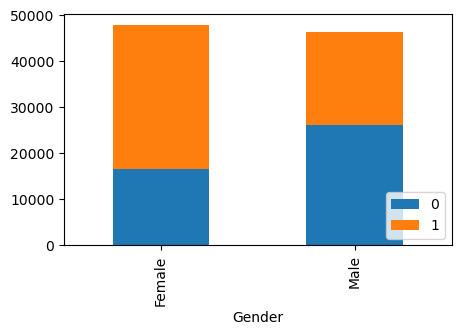

In [337]:
pd.crosstab(df['Gender'],df['Overall_Experience']).plot(
    kind='bar',figsize=(5,3),stacked=True)
plt.legend(loc="lower right")
plt.show()

In [338]:
df['Gender'].isnull().value_counts()

False    94302
True        77
Name: Gender, dtype: int64

**Impute**

In [339]:
df['Gender'].fillna('Female', inplace= True)
df_submit['Gender'].fillna('Female', inplace= True)

#### Age

In [340]:
df['Age'].isna().value_counts()

False    94346
True        33
Name: Age, dtype: int64

In [341]:
df['Age'].mean(), df_submit['Age'].mean()

(39.41964683187417, 39.446995026832624)

In [342]:
df['Age'].fillna(39, inplace= True)
df_submit['Age'].fillna(39, inplace= True)

#### Customer type (this need knn imputing)

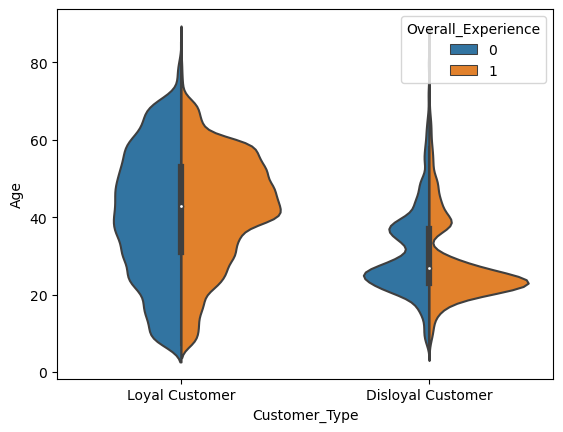

In [343]:
sns.violinplot(data=df, y='Age', x='Customer_Type', hue='Overall_Experience',
               split = True,
               size=2)
plt.show()

In [344]:
df['Customer_Type'].isnull().value_counts()

False    85428
True      8951
Name: Customer_Type, dtype: int64

In [345]:
df['Type_Travel'].isnull().value_counts()

False    85153
True      9226
Name: Type_Travel, dtype: int64

#### Departure_Delay_in_Mins,Arrival_Delay_in_Mins        

In [346]:
df['Departure_Delay_in_Mins']

0         0.0
1         9.0
2        77.0
3        13.0
4         0.0
         ... 
94374    83.0
94375     5.0
94376     0.0
94377     0.0
94378    28.0
Name: Departure_Delay_in_Mins, Length: 94379, dtype: float64

In [347]:
sns.scatterplot(x=df['Departure_Delay_in_Mins'], y=df['Arrival_Delay_in_Mins'])
plt.show()

**Impute departure**

In [348]:
df['Departure_Delay_in_Mins'].fillna(df['Arrival_Delay_in_Mins'], inplace= True)
df['Departure_Delay_in_Mins'].fillna(df['Departure_Delay_in_Mins'].mean(), inplace= True)
df['Departure_Delay_in_Mins'].isnull().value_counts()

False    94379
Name: Departure_Delay_in_Mins, dtype: int64

In [349]:
df_submit['Departure_Delay_in_Mins'].fillna(df_submit['Arrival_Delay_in_Mins'], inplace= True)
df_submit['Departure_Delay_in_Mins'].fillna(df_submit['Departure_Delay_in_Mins'].mean(), inplace= True)
df_submit['Departure_Delay_in_Mins'].isnull().value_counts()

False    35602
Name: Departure_Delay_in_Mins, dtype: int64

**Impute Arrival**

In [350]:
df['Arrival_Delay_in_Mins'].fillna(df['Departure_Delay_in_Mins'], inplace= True)
df['Arrival_Delay_in_Mins'].isnull().value_counts()

False    94379
Name: Arrival_Delay_in_Mins, dtype: int64

In [351]:
df_submit['Arrival_Delay_in_Mins'].fillna(df_submit['Departure_Delay_in_Mins'], inplace= True)
df_submit['Arrival_Delay_in_Mins'].isnull().value_counts()

False    35602
Name: Arrival_Delay_in_Mins, dtype: int64

## Export to csv for knn imputing

In [352]:
df.isnull().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                  0
Seat_Class                    0
Arrival_Time_Convenient       0
Catering                      0
Platform_Location             0
Onboard_Wifi_Service          0
Onboard_Entertainment         0
Online_Support                0
Ease_of_Online_Booking        0
Onboard_Service               0
Legroom                       0
Baggage_Handling              0
CheckIn_Service               0
Cleanliness                   0
Online_Boarding               0
Gender                        0
Customer_Type              8951
Age                           0
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins       0
Arrival_Delay_in_Mins         0
dtype: int64

In [353]:
df_submit.isnull().sum()

ID                            0
Seat_Comfort                  0
Seat_Class                    0
Arrival_Time_Convenient       0
Catering                      0
Platform_Location             0
Onboard_Wifi_Service          0
Onboard_Entertainment         0
Online_Support                0
Ease_of_Online_Booking        0
Onboard_Service               0
Legroom                       0
Baggage_Handling              0
CheckIn_Service               0
Cleanliness                   0
Online_Boarding               0
Gender                        0
Customer_Type              3383
Age                           0
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins       0
Arrival_Delay_in_Mins         0
dtype: int64

In [354]:
df.to_csv('1.df correlation filled.csv', index=False)

In [355]:
df_submit.to_csv('1.df_submit correlation filled.csv', index=False)